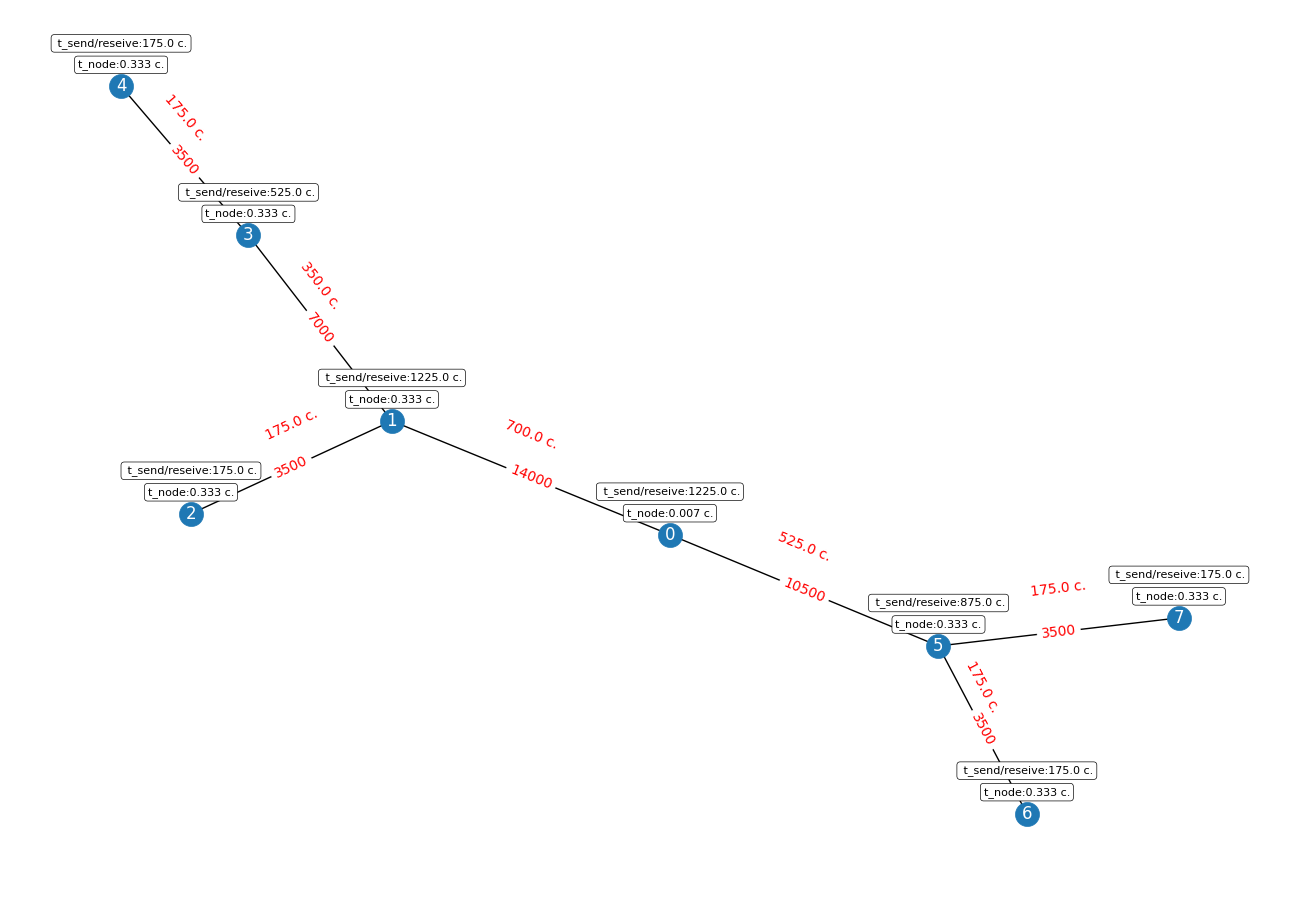

Cвертка: 2.0927342274392955e-06,
Временя выполнение задачи (с): 6827.34,
Хромосома: [0 0 0 0 0 0 0 0]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 500, 500, 500, 500, 500, 500, 500]
Нагрузка на сеть: {'01': 14000, '05': 10500, '12': 3500, '13': 7000, '34': 3500, '56': 3500, '57': 3500}
v_reseive_to_node: [24500, 10500, 0, 3500, 0, 7000, 0, 0]
v_sent_to_node: [0, 14000, 3500, 7000, 3500, 10500, 3500, 3500]
t_node: [0.006666666666666667, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
t_send_reseive_data_node: [1225.0, 1225.0, 175.0, 525.0, 175.0, 875.0, 175.0, 175.0]
t_edges: [700.0, 525.0, 175.0, 350.0, 175.0, 175.0, 175.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:477843.76386083994
Огра

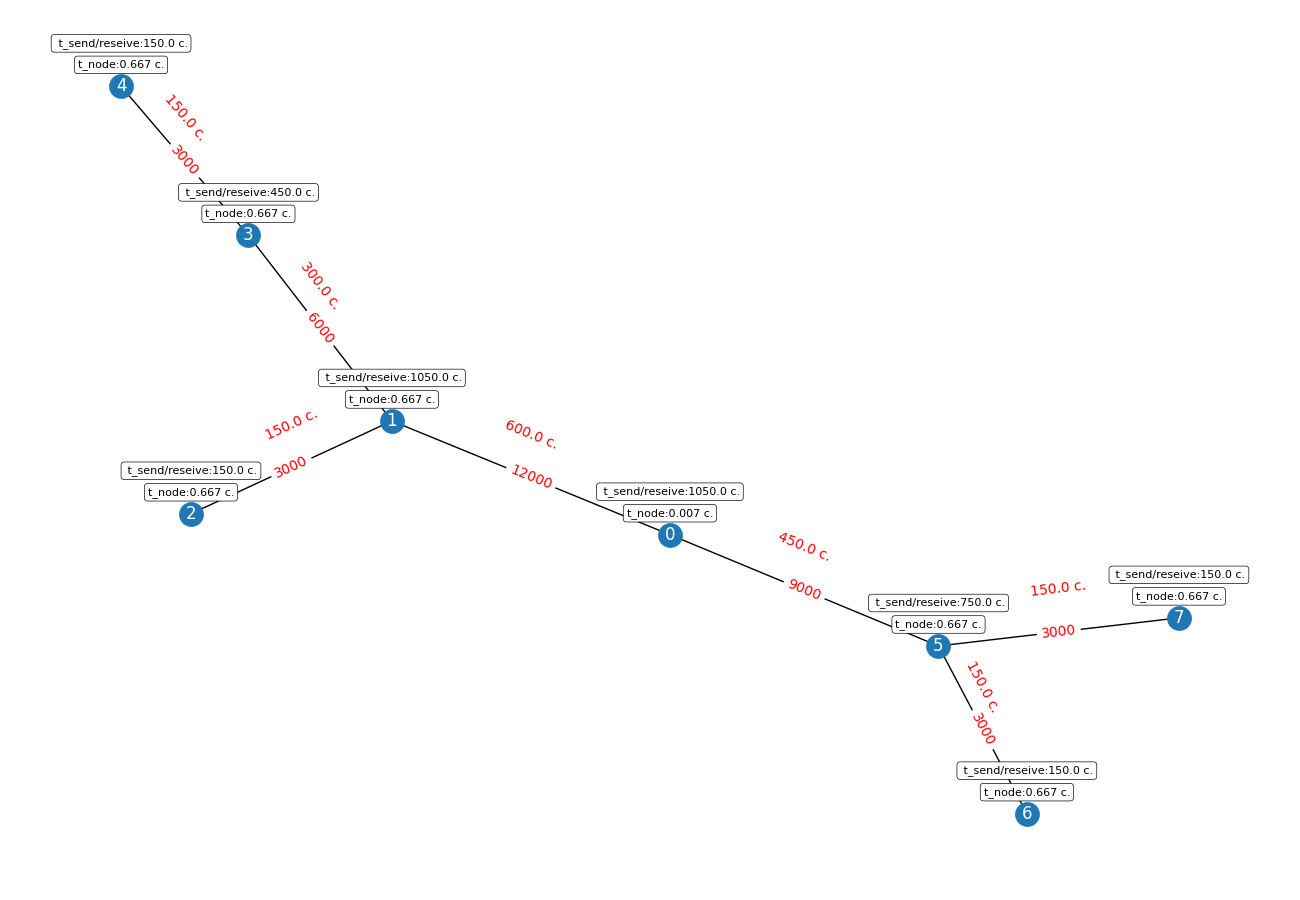

Cвертка: 2.4408873596883835e-06,
Временя выполнение задачи (с): 5854.673333333333,
Хромосома: [1 1 1 1 1 1 1 1]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Нагрузка на сеть: {'01': 12000, '05': 9000, '12': 3000, '13': 6000, '34': 3000, '56': 3000, '57': 3000}
v_reseive_to_node: [21000, 9000, 0, 3000, 0, 6000, 0, 0]
v_sent_to_node: [0, 12000, 3000, 6000, 3000, 9000, 3000, 3000]
t_node: [0.006666666666666667, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
t_send_reseive_data_node: [1050.0, 1050.0, 150.0, 450.0, 150.0, 750.0, 150.0, 150.0]
t_edges: [600.0, 450.0, 150.0, 300.0, 150.0, 150.0, 150.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:409687.07

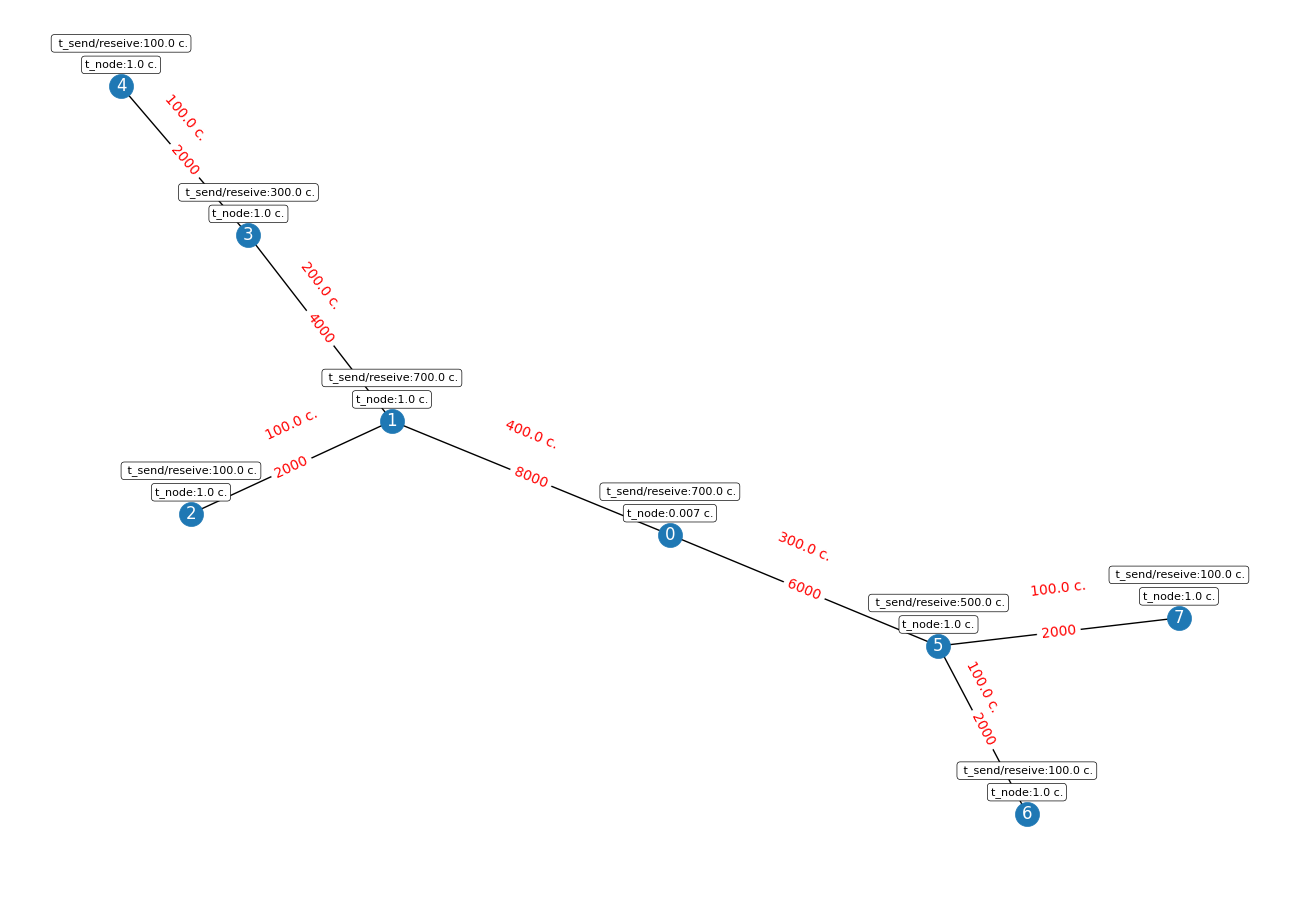

Cвертка: 3.6592457590350952e-06,
Временя выполнение задачи (с): 3907.0066666666667,
Хромосома: [2 2 2 2 2 2 2 2]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 1500, 1500, 1500, 1500, 1500, 1500, 1500]
Нагрузка на сеть: {'01': 8000, '05': 6000, '12': 2000, '13': 4000, '34': 2000, '56': 2000, '57': 2000}
v_reseive_to_node: [14000, 6000, 0, 2000, 0, 4000, 0, 0]
v_sent_to_node: [0, 8000, 2000, 4000, 2000, 6000, 2000, 2000]
t_node: [0.006666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
t_send_reseive_data_node: [700.0, 700.0, 100.0, 300.0, 100.0, 500.0, 100.0, 100.0]
t_edges: [400.0, 300.0, 100.0, 200.0, 100.0, 100.0, 100.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:273280.36044884
Ограничения
1




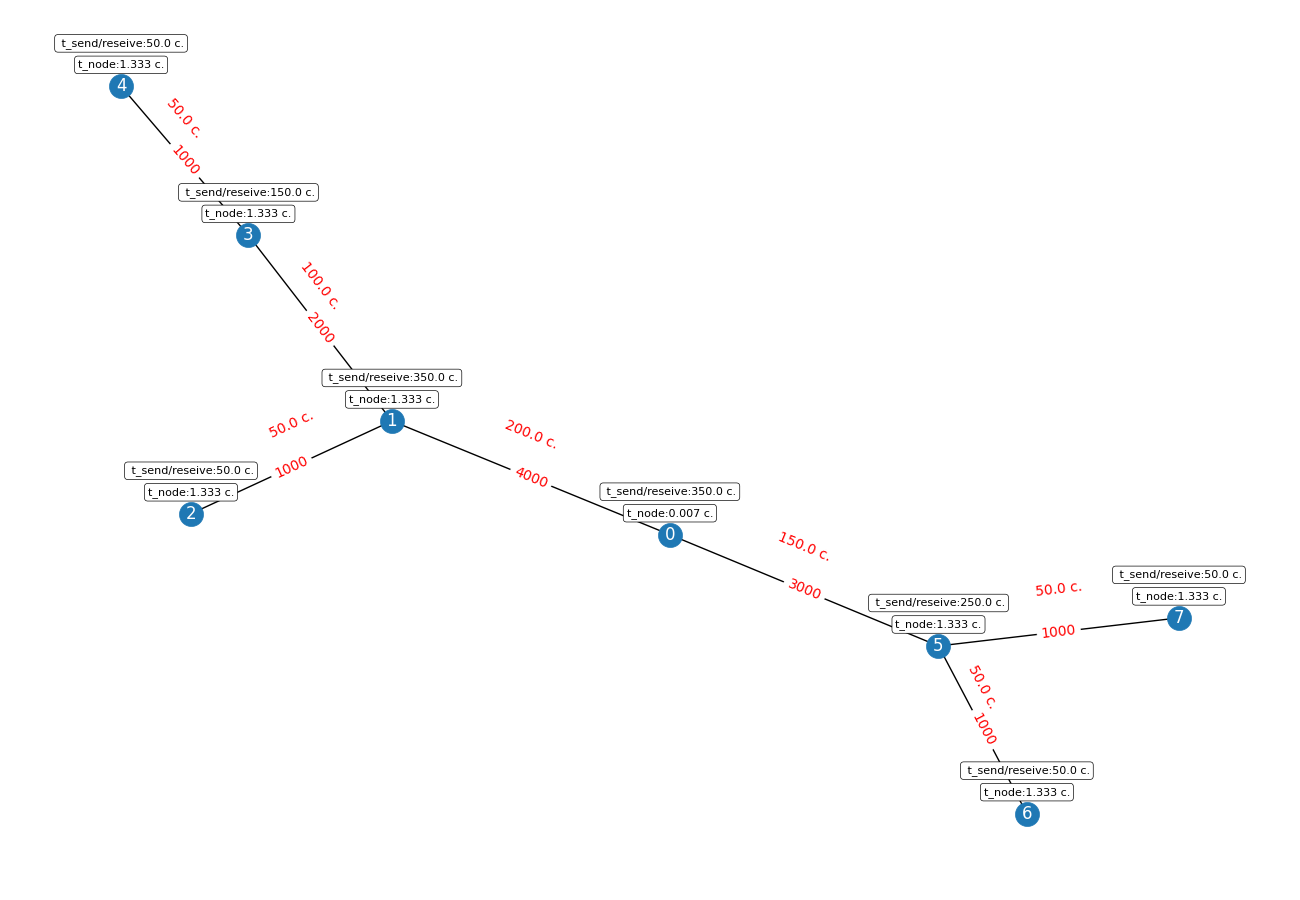

Cвертка: 7.306008290164217e-06,
Временя выполнение задачи (с): 1959.34,
Хромосома: [3 3 3 3 3 3 3 3]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Нагрузка на сеть: {'01': 4000, '05': 3000, '12': 1000, '13': 2000, '34': 1000, '56': 1000, '57': 1000}
v_reseive_to_node: [7000, 3000, 0, 1000, 0, 2000, 0, 0]
v_sent_to_node: [0, 4000, 1000, 2000, 1000, 3000, 1000, 1000]
t_node: [0.006666666666666667, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333]
t_send_reseive_data_node: [350.0, 350.0, 50.0, 150.0, 50.0, 250.0, 50.0, 50.0]
t_edges: [200.0, 150.0, 50.0, 100.0, 50.0, 50.0, 50.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:136873.64704284
Ограничения
1




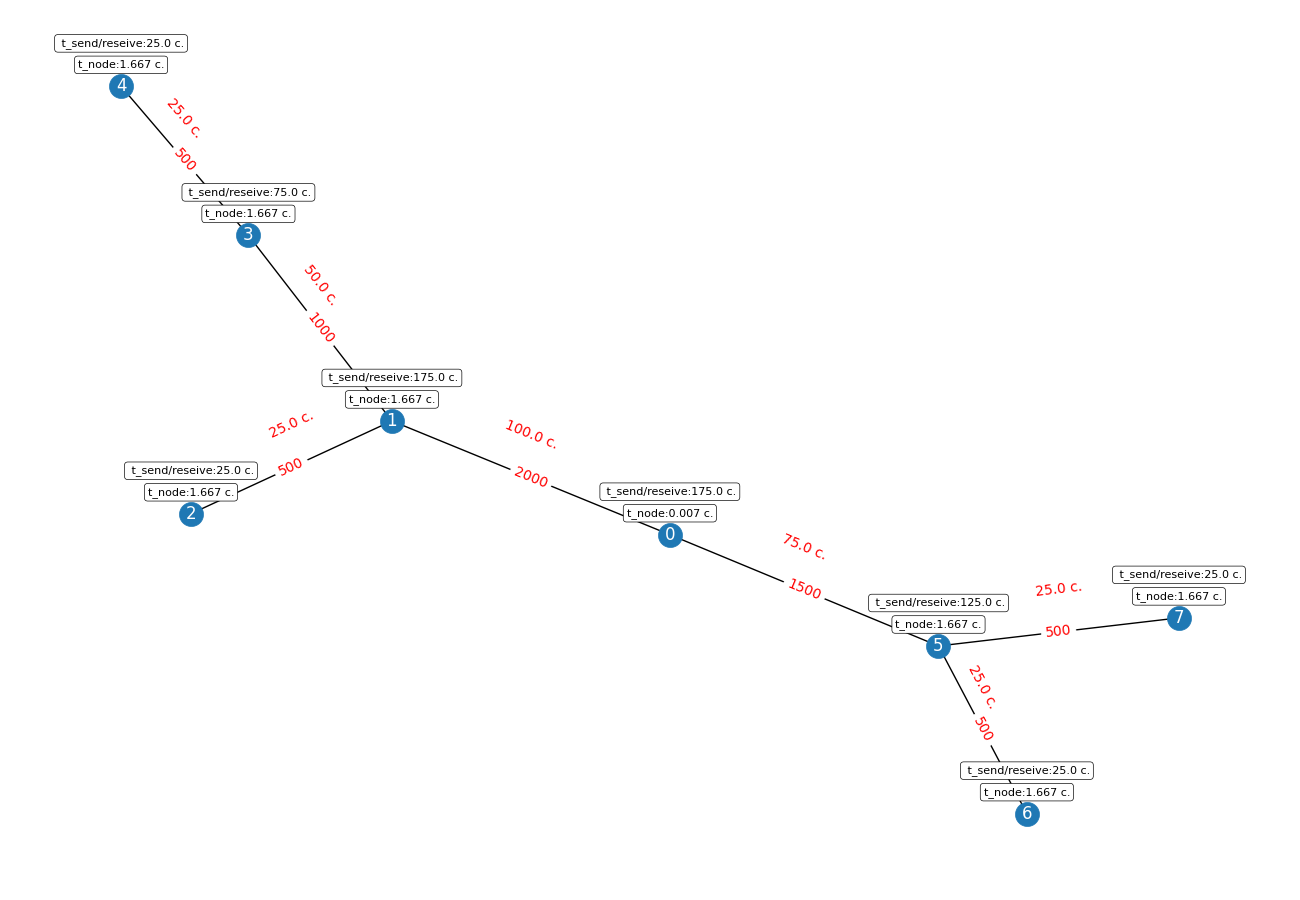

Cвертка: 1.4552448814983004e-05,
Временя выполнение задачи (с): 986.6733333333333,
Хромосома: [4 4 4 4 4 4 4 4]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 2500, 2500, 2500, 2500, 2500, 2500, 2500]
Нагрузка на сеть: {'01': 2000, '05': 1500, '12': 500, '13': 1000, '34': 500, '56': 500, '57': 500}
v_reseive_to_node: [3500, 1500, 0, 500, 0, 1000, 0, 0]
v_sent_to_node: [0, 2000, 500, 1000, 500, 1500, 500, 500]
t_node: [0.006666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667]
t_send_reseive_data_node: [175.0, 175.0, 25.0, 75.0, 25.0, 125.0, 25.0, 25.0]
t_edges: [100.0, 75.0, 25.0, 50.0, 25.0, 25.0, 25.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:68716.95703683999
Ограничения
1




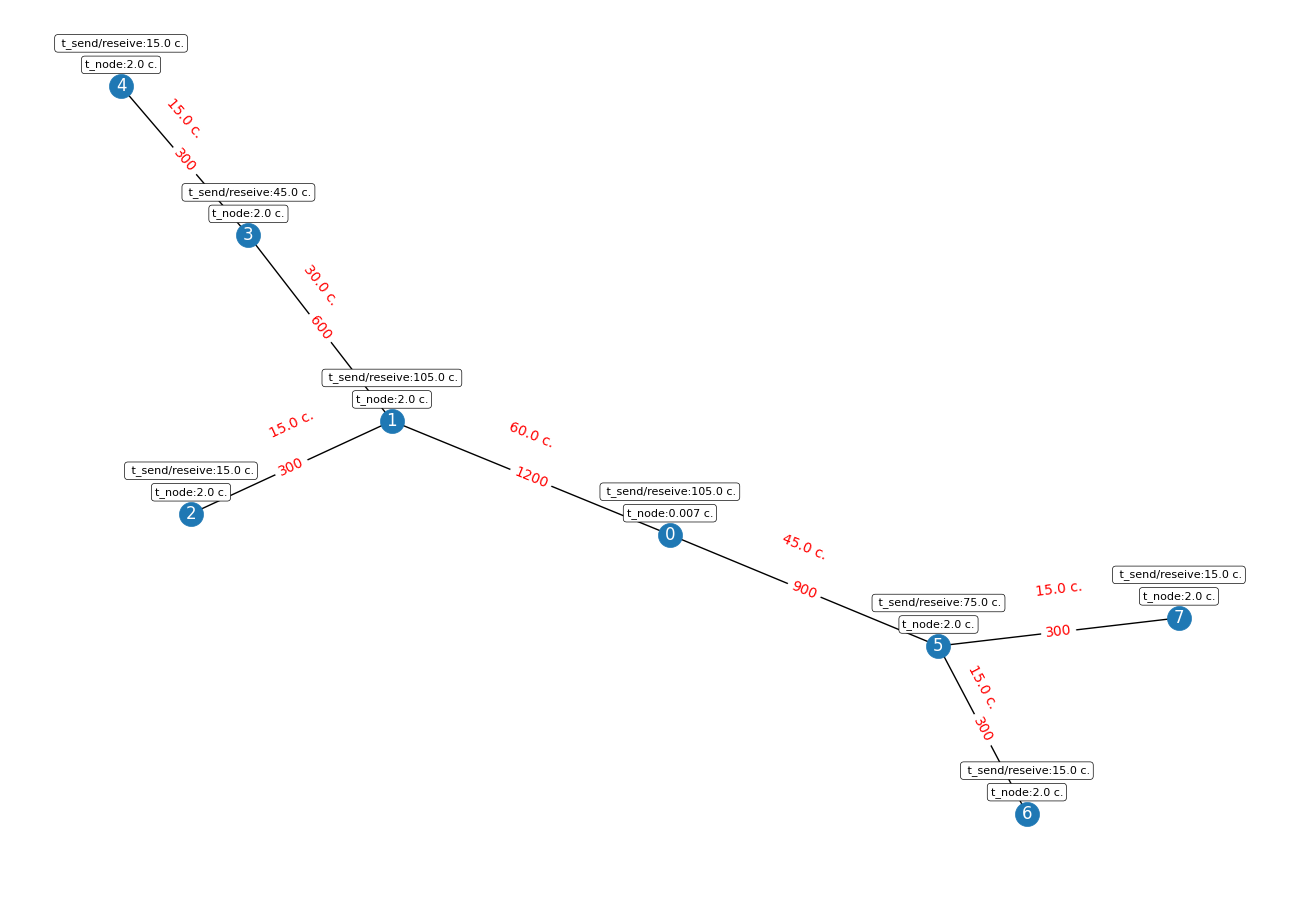

Cвертка: 2.4090417462927675e-05,
Временя выполнение задачи (с): 599.0066666666667,
Хромосома: [5 5 5 5 5 5 5 5]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 3000, 3000, 3000, 3000, 3000, 3000, 3000]
Нагрузка на сеть: {'01': 1200, '05': 900, '12': 300, '13': 600, '34': 300, '56': 300, '57': 300}
v_reseive_to_node: [2100, 900, 0, 300, 0, 600, 0, 0]
v_sent_to_node: [0, 1200, 300, 600, 300, 900, 300, 300]
t_node: [0.006666666666666667, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
t_send_reseive_data_node: [105.0, 105.0, 15.0, 45.0, 15.0, 75.0, 15.0, 15.0]
t_edges: [60.0, 45.0, 15.0, 30.0, 15.0, 15.0, 15.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:41510.28107084
Ограничения
1




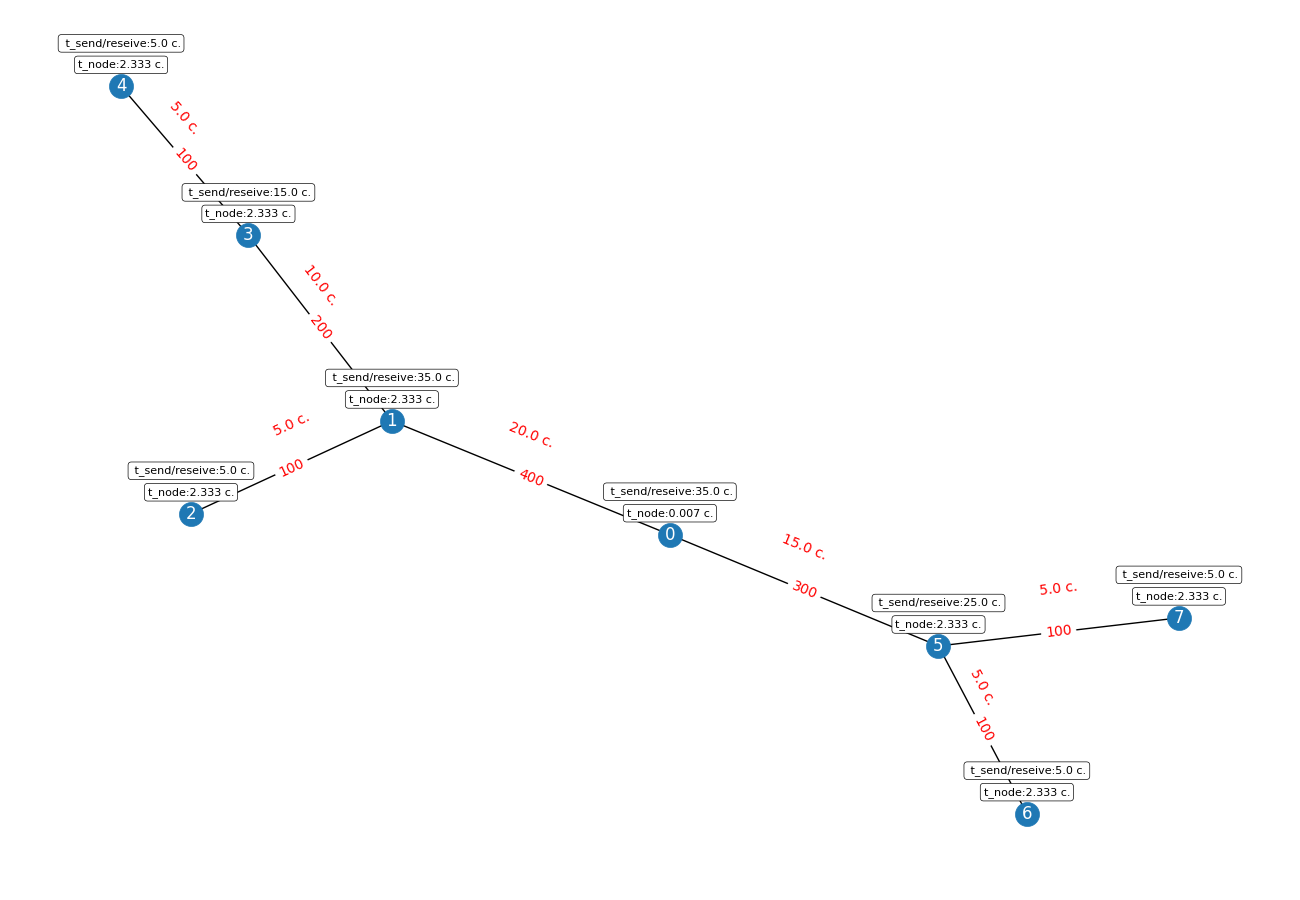

Cвертка: 6.991244463688556e-05,
Временя выполнение задачи (с): 211.34,
Хромосома: [6 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 400, '05': 300, '12': 100, '13': 200, '34': 100, '56': 100, '57': 100}
v_reseive_to_node: [700, 300, 0, 100, 0, 200, 0, 0]
v_sent_to_node: [0, 400, 100, 200, 100, 300, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 35.0, 5.0, 15.0, 5.0, 25.0, 5.0, 5.0]
t_edges: [20.0, 15.0, 5.0, 10.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:14303.605104839999
Ограничения
1




In [20]:
for i in range(7):
  res = Solution(np.full((8,), i))
  res.draw_result()
  print(res)

In [21]:
experements = []
arr_algo = []

for i in range(10):
    RANDOM_SEED = i
    random.seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)
    algo = GA(100, 0.9, 0.1, 100)
    algo.optimize()
    arr_algo.append(algo)
    experements.append(algo.HISTORY)
    algo.print_res()
    print()

Cвертка: 6.991244463688556e-05,
Временя выполнение задачи (с): 211.34,
Хромосома: [3 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 400, '05': 300, '12': 100, '13': 200, '34': 100, '56': 100, '57': 100}
v_reseive_to_node: [700, 300, 0, 100, 0, 200, 0, 0]
v_sent_to_node: [0, 400, 100, 200, 100, 300, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 35.0, 5.0, 15.0, 5.0, 25.0, 5.0, 5.0]
t_edges: [20.0, 15.0, 5.0, 10.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:14303.605104839999
Ограничения
1



Cвертка: 6.991244463688556e-05,

<ipython-input-22-3d584a83d833>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


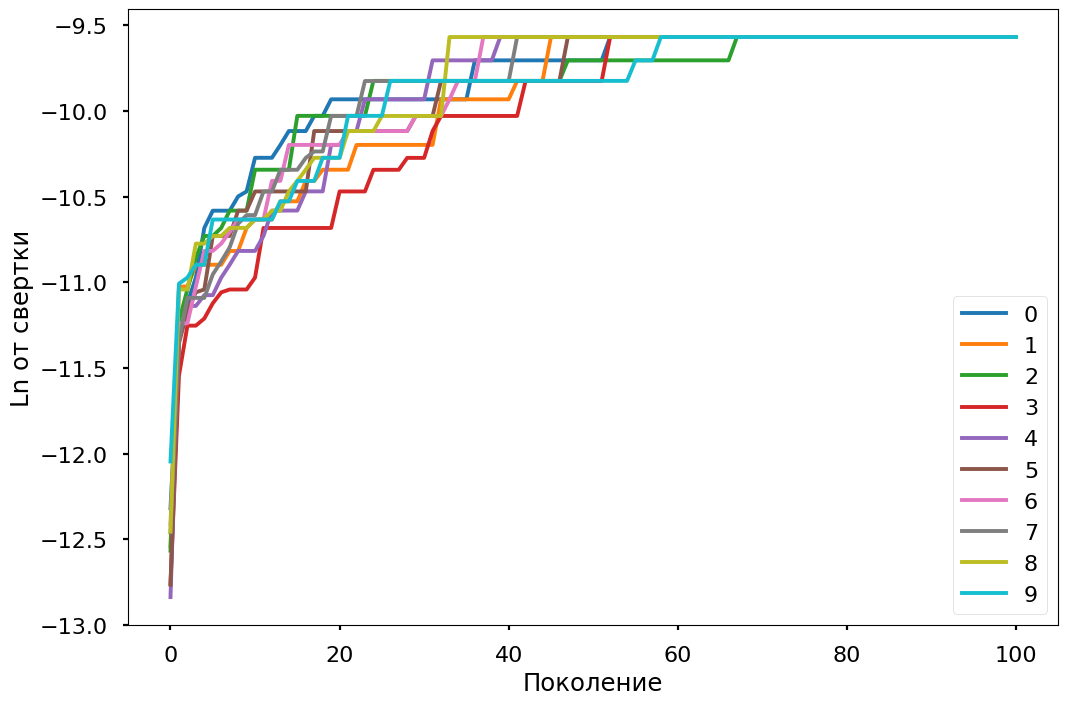

In [22]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')


plt.figure(figsize = (12, 8))
for exp in range(len(experements)):
  plt.plot([i for i in range(len(experements[exp]))], np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))]), label = str(exp))

plt.xlabel('Поколение')
plt.ylabel('Ln от свертки')
plt.legend()
plt.show()

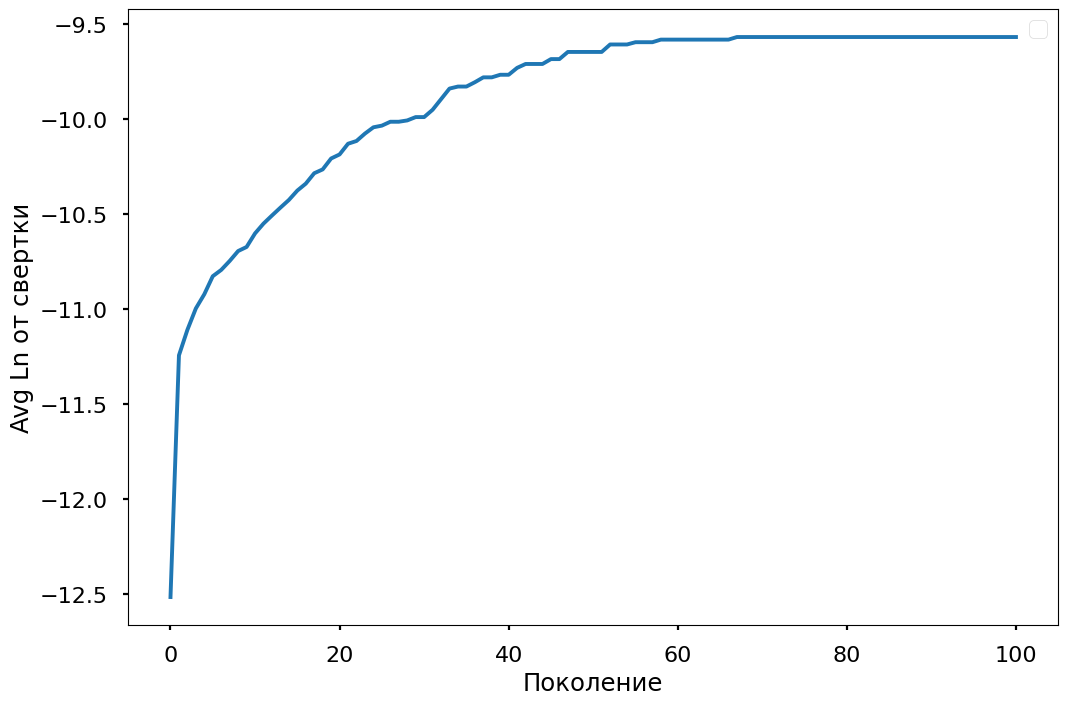

In [23]:
plt.figure(figsize = (12, 8))
y = np.zeros(len(experements[exp]))
for exp in range(len(experements)):
  y += np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))])

plt.plot([i for i in range(len(experements[exp]))], y/10)

plt.xlabel('Поколение')
plt.ylabel('Avg Ln от свертки')
plt.legend()
plt.show()

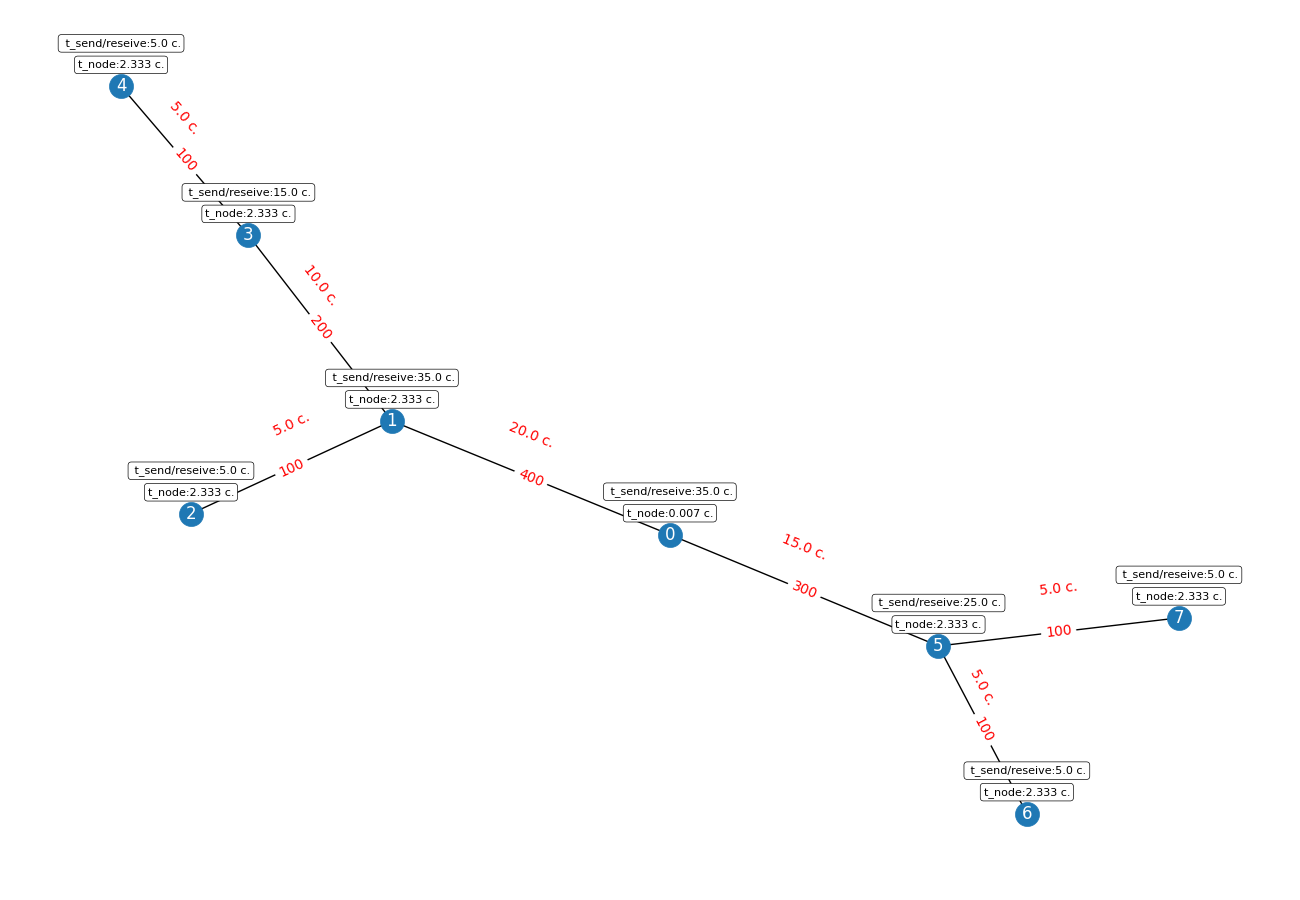

In [24]:
experements[0][-1][-1].draw_result()

In [25]:
print(experements[0][-1][-1])

Cвертка: 6.991244463688556e-05,
Временя выполнение задачи (с): 211.34,
Хромосома: [3 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 400, '05': 300, '12': 100, '13': 200, '34': 100, '56': 100, '57': 100}
v_reseive_to_node: [700, 300, 0, 100, 0, 200, 0, 0]
v_sent_to_node: [0, 400, 100, 200, 100, 300, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 35.0, 5.0, 15.0, 5.0, 25.0, 5.0, 5.0]
t_edges: [20.0, 15.0, 5.0, 10.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:14303.605104839999
Ограничения
1




In [26]:
CRITERIA = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Временя выполнение задачи (с)' :[f1, 'min', {'index_node':[i for i in range(net.number)],}],
        # 'Энергопотребление (МВт)' : [f2, 'min', {'index_node':[i for i in range(net.number)]}],
        'Объемы передаваемой информации' : [f3, 'min', {'index_node':[i for i in range(net.number)]}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
        #'Нагрузка':{
        #    'index_node': [i for i in range(net.number)],
        #    'f': [f4, 'min', {}]
        #},
        #'Объемы передаваемой информации': {
        #    'index_node': [i for i in range(net.number)],
        #    'f':[f5, 'min', {}]
        #},
    }
}
LIMITATIONS = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Ограничение по времени' :[f1, {'index_node':[i for i in range(net.number)], 'T_lim': 77}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
    }

}

In [27]:
Solution._NET = net
Solution._TASK = task
Solution._CRITERIA = CRITERIA
Solution._LIMITATIONS = LIMITATIONS

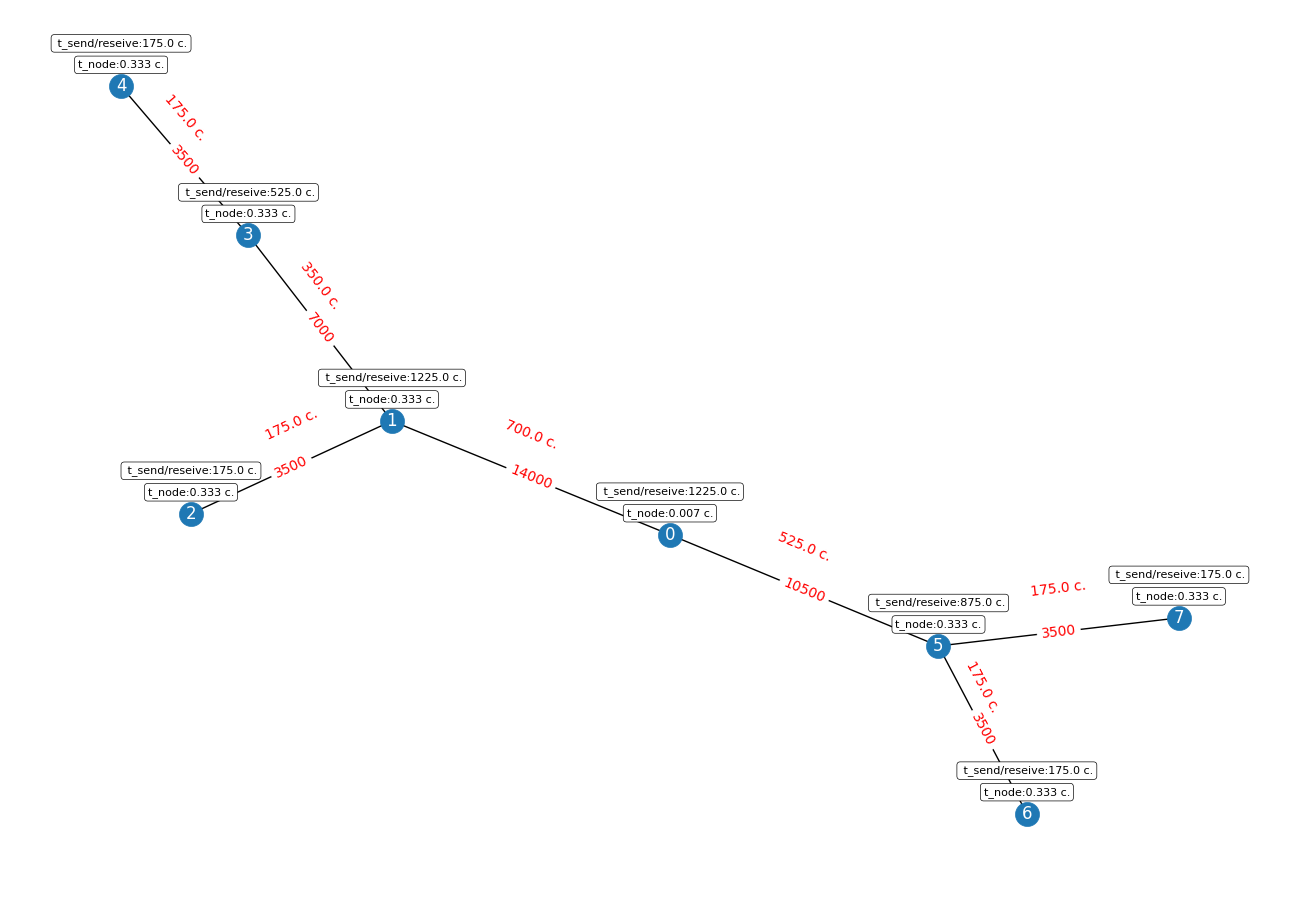

Cвертка: 2.1978021978021977e-05,
Временя выполнение задачи (с): 6827.34,
Хромосома: [0 0 0 0 0 0 0 0]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 500, 500, 500, 500, 500, 500, 500]
Нагрузка на сеть: {'01': 14000, '05': 10500, '12': 3500, '13': 7000, '34': 3500, '56': 3500, '57': 3500}
v_reseive_to_node: [24500, 10500, 0, 3500, 0, 7000, 0, 0]
v_sent_to_node: [0, 14000, 3500, 7000, 3500, 10500, 3500, 3500]
t_node: [0.006666666666666667, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
t_send_reseive_data_node: [1225.0, 1225.0, 175.0, 525.0, 175.0, 875.0, 175.0, 175.0]
t_edges: [700.0, 525.0, 175.0, 350.0, 175.0, 175.0, 175.0]

Целевые функции (критерии оценки)
Объемы передаваемой информации / min:45500
Ограничени

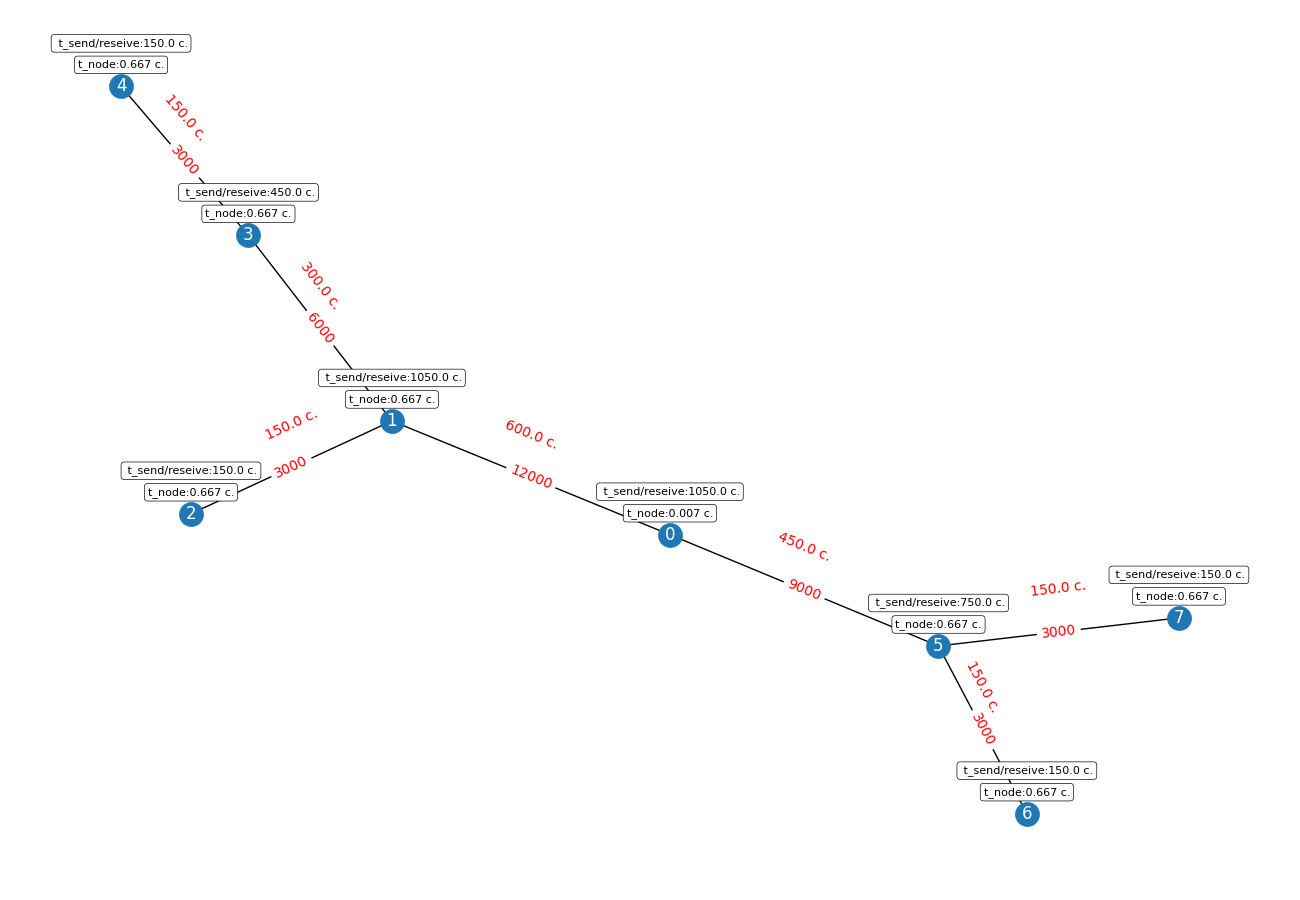

Cвертка: 2.564102564102564e-05,
Временя выполнение задачи (с): 5854.673333333333,
Хромосома: [1 1 1 1 1 1 1 1]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Нагрузка на сеть: {'01': 12000, '05': 9000, '12': 3000, '13': 6000, '34': 3000, '56': 3000, '57': 3000}
v_reseive_to_node: [21000, 9000, 0, 3000, 0, 6000, 0, 0]
v_sent_to_node: [0, 12000, 3000, 6000, 3000, 9000, 3000, 3000]
t_node: [0.006666666666666667, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
t_send_reseive_data_node: [1050.0, 1050.0, 150.0, 450.0, 150.0, 750.0, 150.0, 150.0]
t_edges: [600.0, 450.0, 150.0, 300.0, 150.0, 150.0, 150.0]

Целевые функции (критерии оценки)
Объемы передаваемой информации / min:390

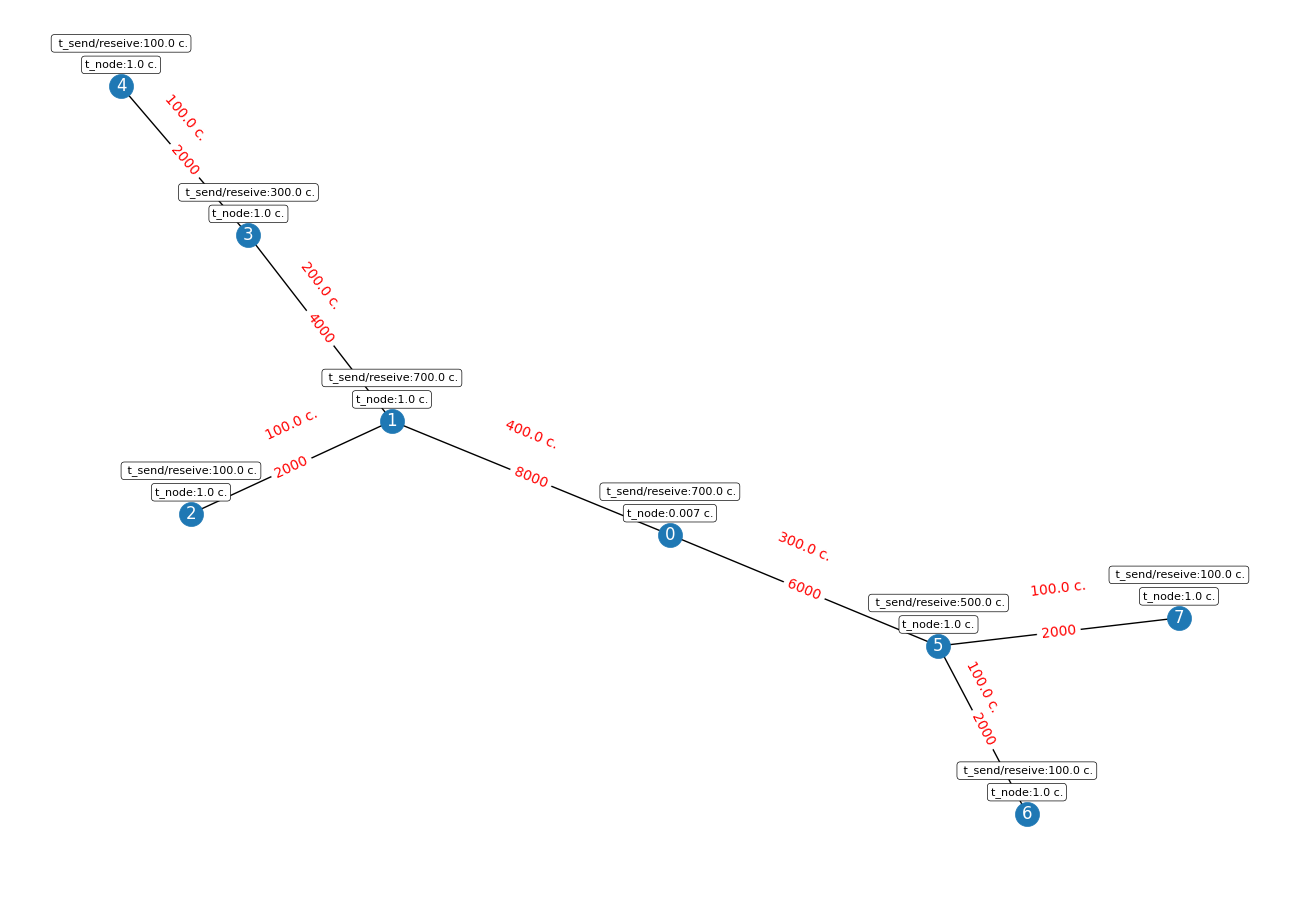

Cвертка: 3.846153846153846e-05,
Временя выполнение задачи (с): 3907.0066666666667,
Хромосома: [2 2 2 2 2 2 2 2]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 1500, 1500, 1500, 1500, 1500, 1500, 1500]
Нагрузка на сеть: {'01': 8000, '05': 6000, '12': 2000, '13': 4000, '34': 2000, '56': 2000, '57': 2000}
v_reseive_to_node: [14000, 6000, 0, 2000, 0, 4000, 0, 0]
v_sent_to_node: [0, 8000, 2000, 4000, 2000, 6000, 2000, 2000]
t_node: [0.006666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
t_send_reseive_data_node: [700.0, 700.0, 100.0, 300.0, 100.0, 500.0, 100.0, 100.0]
t_edges: [400.0, 300.0, 100.0, 200.0, 100.0, 100.0, 100.0]

Целевые функции (критерии оценки)
Объемы передаваемой информации / min:26000
Ограничения
1




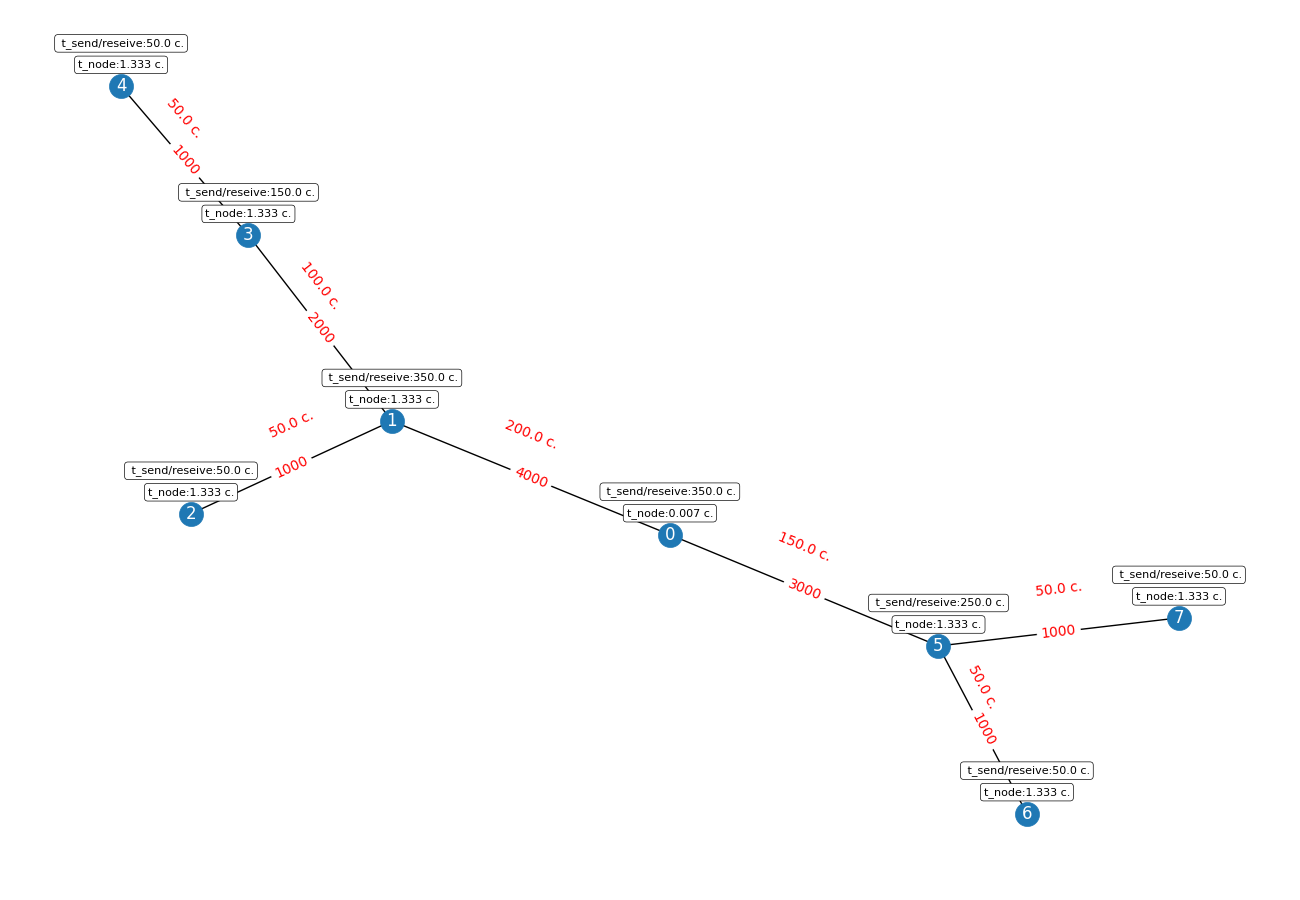

Cвертка: 7.692307692307693e-05,
Временя выполнение задачи (с): 1959.34,
Хромосома: [3 3 3 3 3 3 3 3]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Нагрузка на сеть: {'01': 4000, '05': 3000, '12': 1000, '13': 2000, '34': 1000, '56': 1000, '57': 1000}
v_reseive_to_node: [7000, 3000, 0, 1000, 0, 2000, 0, 0]
v_sent_to_node: [0, 4000, 1000, 2000, 1000, 3000, 1000, 1000]
t_node: [0.006666666666666667, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333]
t_send_reseive_data_node: [350.0, 350.0, 50.0, 150.0, 50.0, 250.0, 50.0, 50.0]
t_edges: [200.0, 150.0, 50.0, 100.0, 50.0, 50.0, 50.0]

Целевые функции (критерии оценки)
Объемы передаваемой информации / min:13000
Ограничения
1




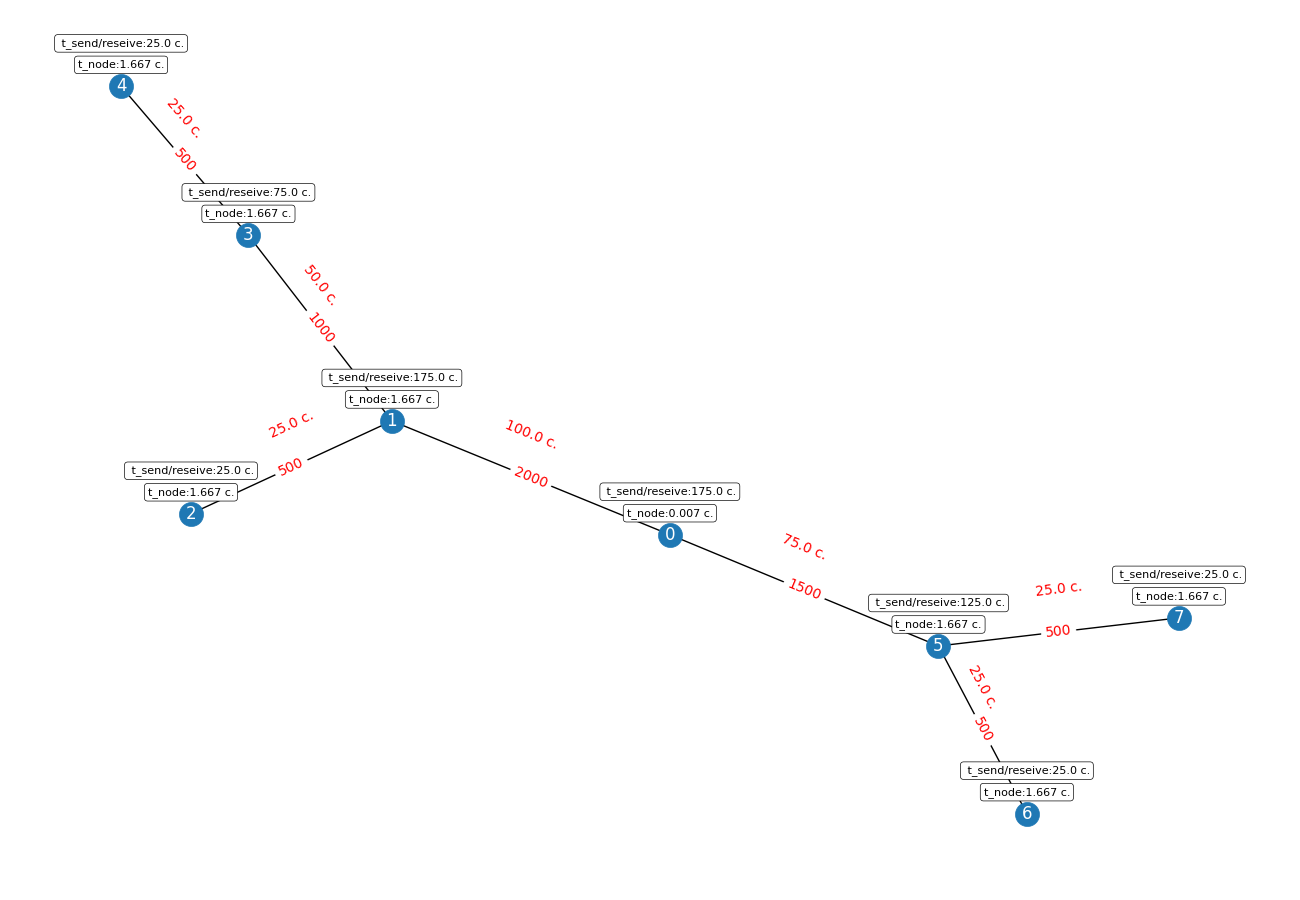

Cвертка: 0.00015384615384615385,
Временя выполнение задачи (с): 986.6733333333333,
Хромосома: [4 4 4 4 4 4 4 4]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 2500, 2500, 2500, 2500, 2500, 2500, 2500]
Нагрузка на сеть: {'01': 2000, '05': 1500, '12': 500, '13': 1000, '34': 500, '56': 500, '57': 500}
v_reseive_to_node: [3500, 1500, 0, 500, 0, 1000, 0, 0]
v_sent_to_node: [0, 2000, 500, 1000, 500, 1500, 500, 500]
t_node: [0.006666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667]
t_send_reseive_data_node: [175.0, 175.0, 25.0, 75.0, 25.0, 125.0, 25.0, 25.0]
t_edges: [100.0, 75.0, 25.0, 50.0, 25.0, 25.0, 25.0]

Целевые функции (критерии оценки)
Объемы передаваемой информации / min:6500
Ограничения
1




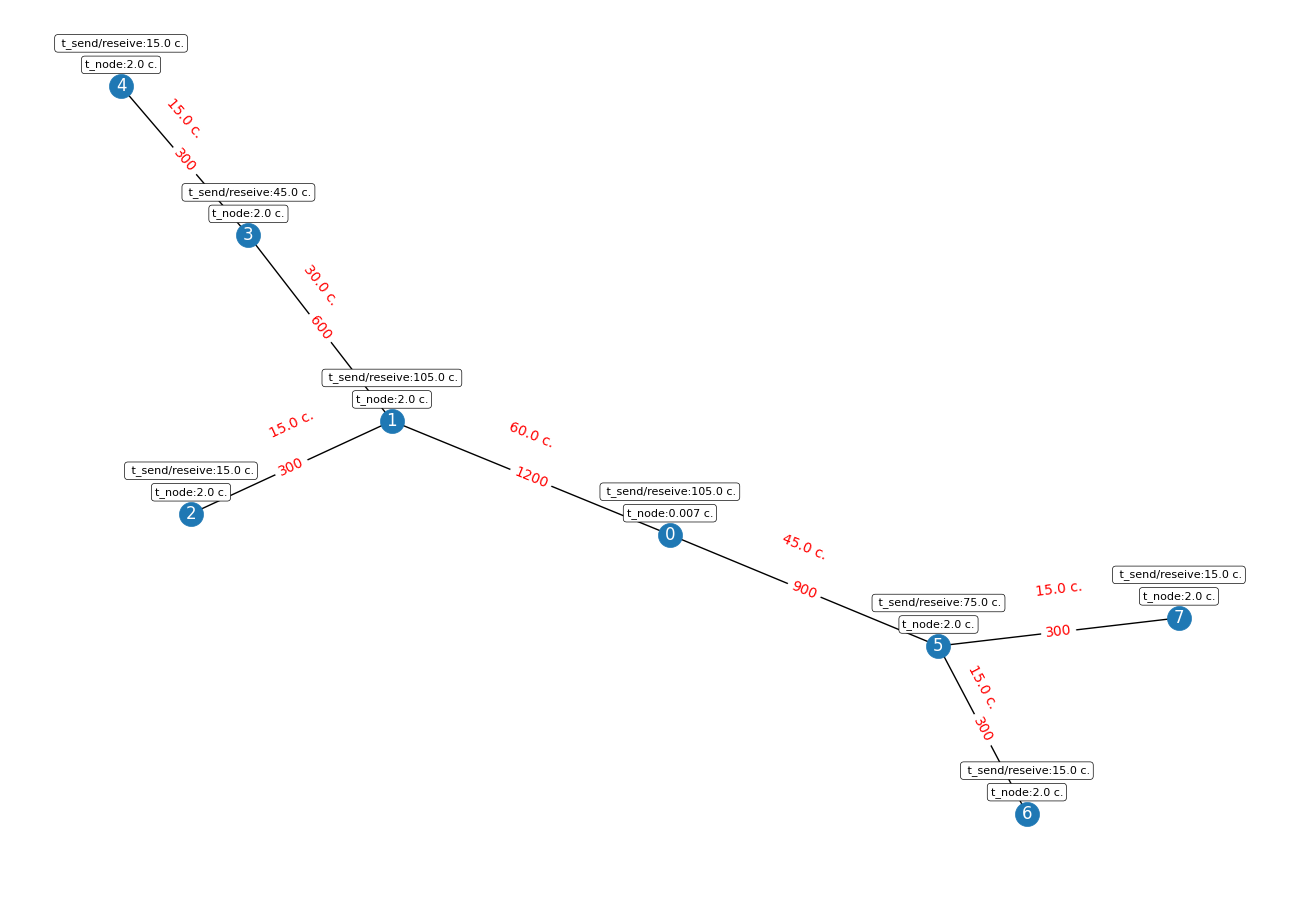

Cвертка: 0.0002564102564102564,
Временя выполнение задачи (с): 599.0066666666667,
Хромосома: [5 5 5 5 5 5 5 5]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 3000, 3000, 3000, 3000, 3000, 3000, 3000]
Нагрузка на сеть: {'01': 1200, '05': 900, '12': 300, '13': 600, '34': 300, '56': 300, '57': 300}
v_reseive_to_node: [2100, 900, 0, 300, 0, 600, 0, 0]
v_sent_to_node: [0, 1200, 300, 600, 300, 900, 300, 300]
t_node: [0.006666666666666667, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
t_send_reseive_data_node: [105.0, 105.0, 15.0, 45.0, 15.0, 75.0, 15.0, 15.0]
t_edges: [60.0, 45.0, 15.0, 30.0, 15.0, 15.0, 15.0]

Целевые функции (критерии оценки)
Объемы передаваемой информации / min:3900
Ограничения
1




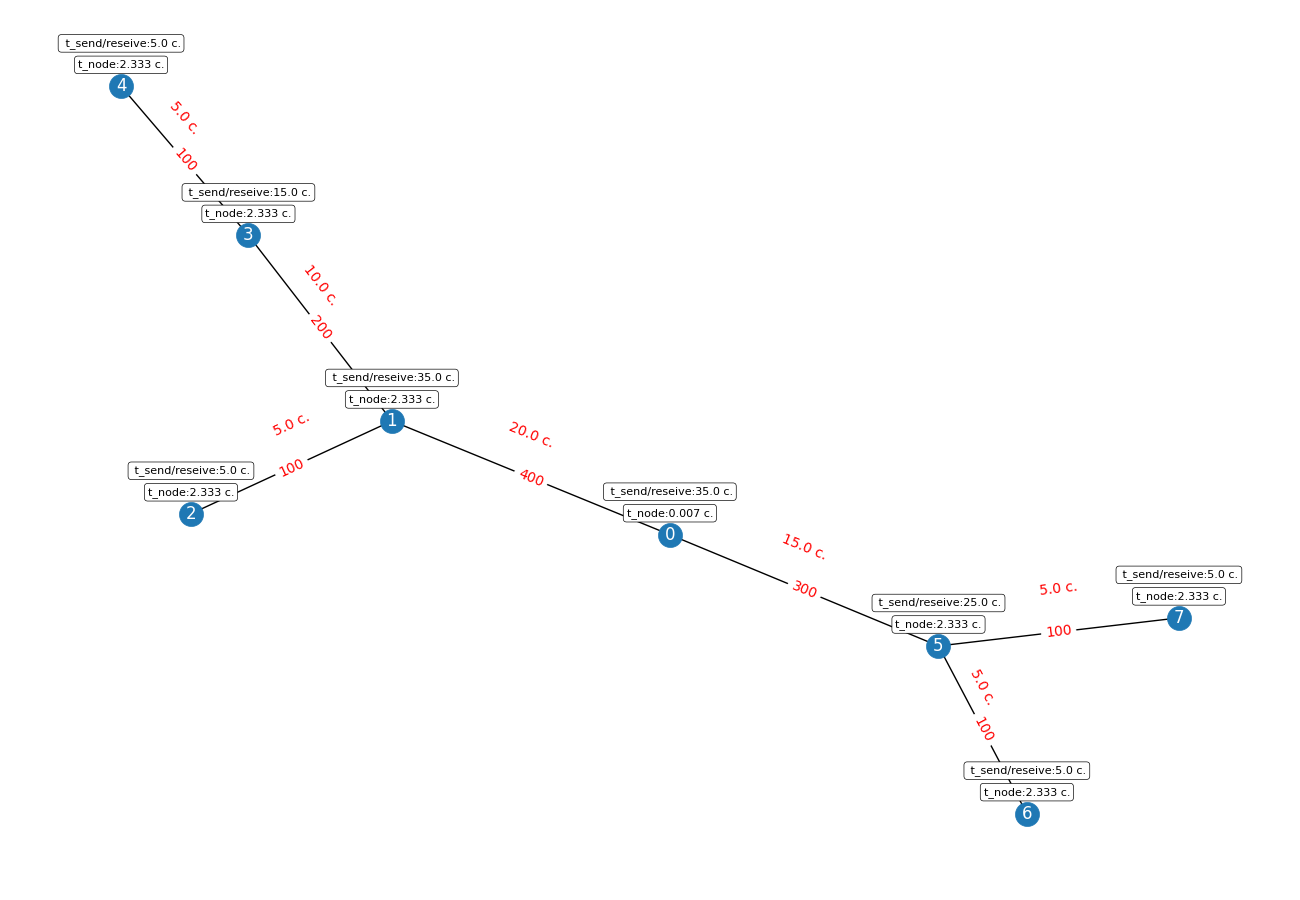

Cвертка: 0.0007692307692307692,
Временя выполнение задачи (с): 211.34,
Хромосома: [6 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 400, '05': 300, '12': 100, '13': 200, '34': 100, '56': 100, '57': 100}
v_reseive_to_node: [700, 300, 0, 100, 0, 200, 0, 0]
v_sent_to_node: [0, 400, 100, 200, 100, 300, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 35.0, 5.0, 15.0, 5.0, 25.0, 5.0, 5.0]
t_edges: [20.0, 15.0, 5.0, 10.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Объемы передаваемой информации / min:1300
Ограничения
1




In [28]:
for i in range(7):
  res = Solution(np.full((8,), i))
  res.draw_result()
  print(res)

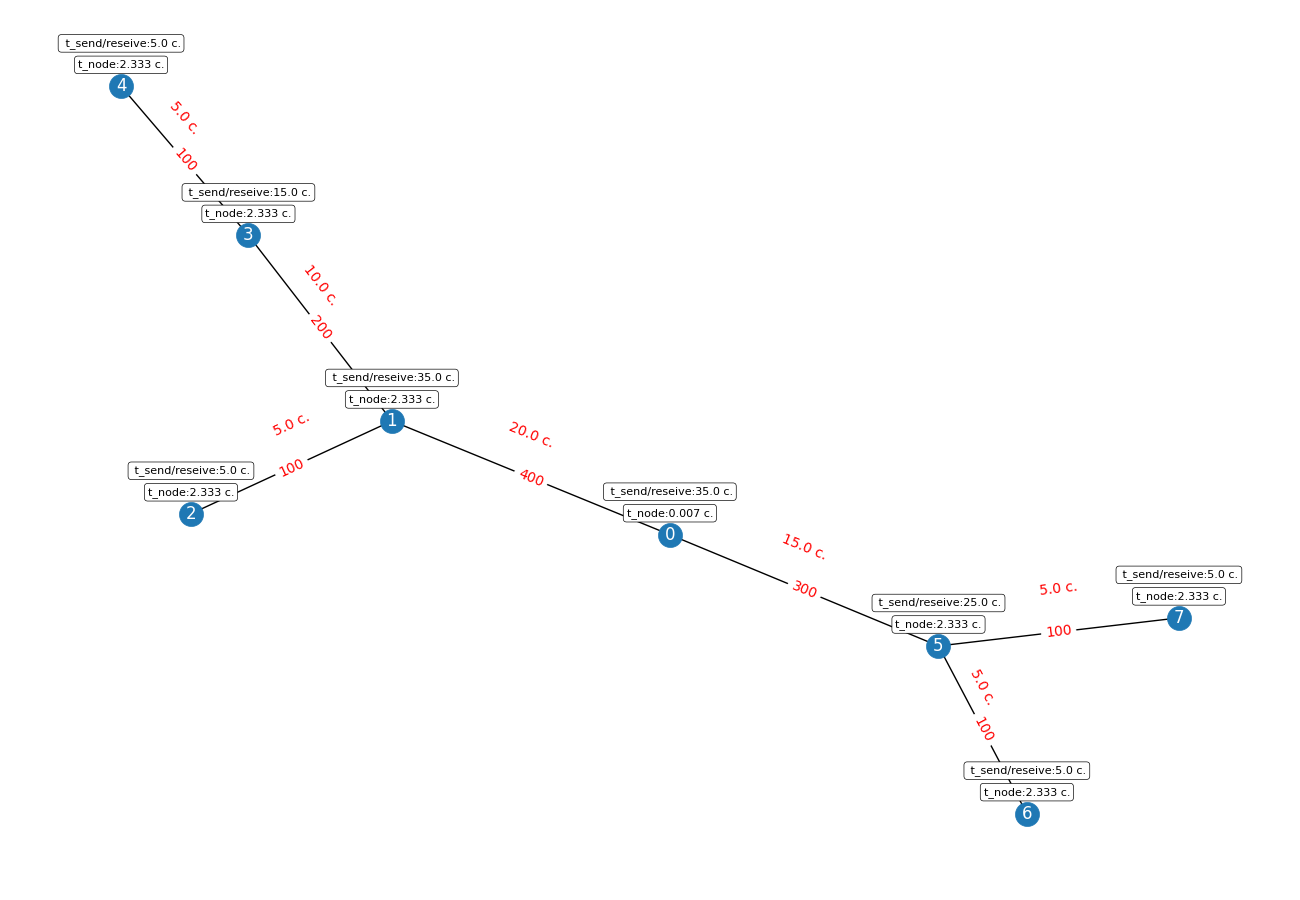

In [29]:
res.draw_result()

In [30]:
experements = []
arr_algo = []

for i in range(10):
    RANDOM_SEED = i
    random.seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)
    algo = GA(100, 0.9, 0.1, 100)
    algo.optimize()
    arr_algo.append(algo)
    experements.append(algo.HISTORY)
    algo.print_res()
    print()

Cвертка: 0.0007692307692307692,
Временя выполнение задачи (с): 211.34,
Хромосома: [3 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 400, '05': 300, '12': 100, '13': 200, '34': 100, '56': 100, '57': 100}
v_reseive_to_node: [700, 300, 0, 100, 0, 200, 0, 0]
v_sent_to_node: [0, 400, 100, 200, 100, 300, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 35.0, 5.0, 15.0, 5.0, 25.0, 5.0, 5.0]
t_edges: [20.0, 15.0, 5.0, 10.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Объемы передаваемой информации / min:1300
Ограничения
1



Cвертка: 0.0007692307692307692,
Времен

<ipython-input-31-3d584a83d833>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


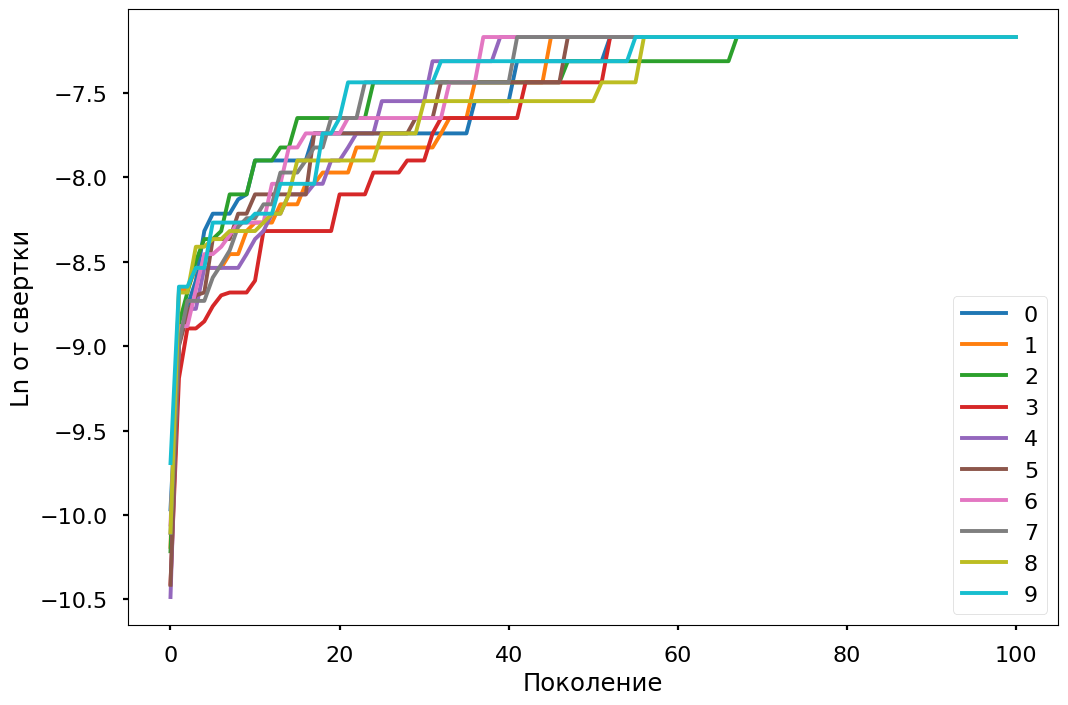

In [31]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')


plt.figure(figsize = (12, 8))
for exp in range(len(experements)):
  plt.plot([i for i in range(len(experements[exp]))], np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))]), label = str(exp))

plt.xlabel('Поколение')
plt.ylabel('Ln от свертки')
plt.legend()
plt.show()

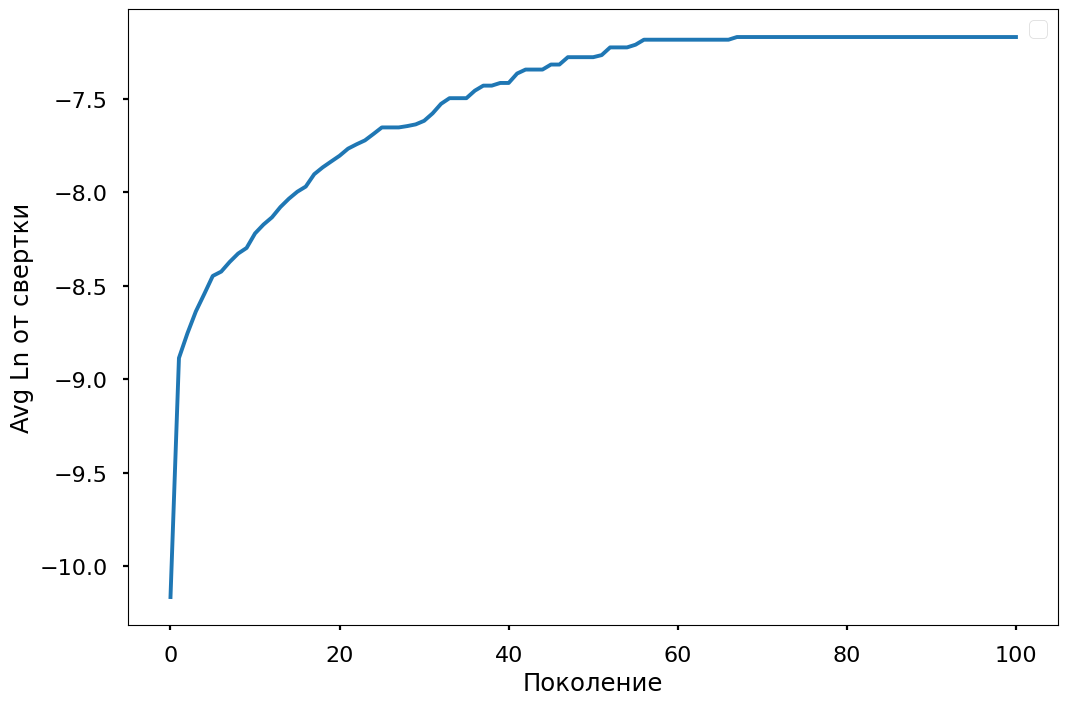

In [32]:
plt.figure(figsize = (12, 8))
y = np.zeros(len(experements[exp]))
for exp in range(len(experements)):
  y += np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))])

plt.plot([i for i in range(len(experements[exp]))], y/10)

plt.xlabel('Поколение')
plt.ylabel('Avg Ln от свертки')
plt.legend()
plt.show()

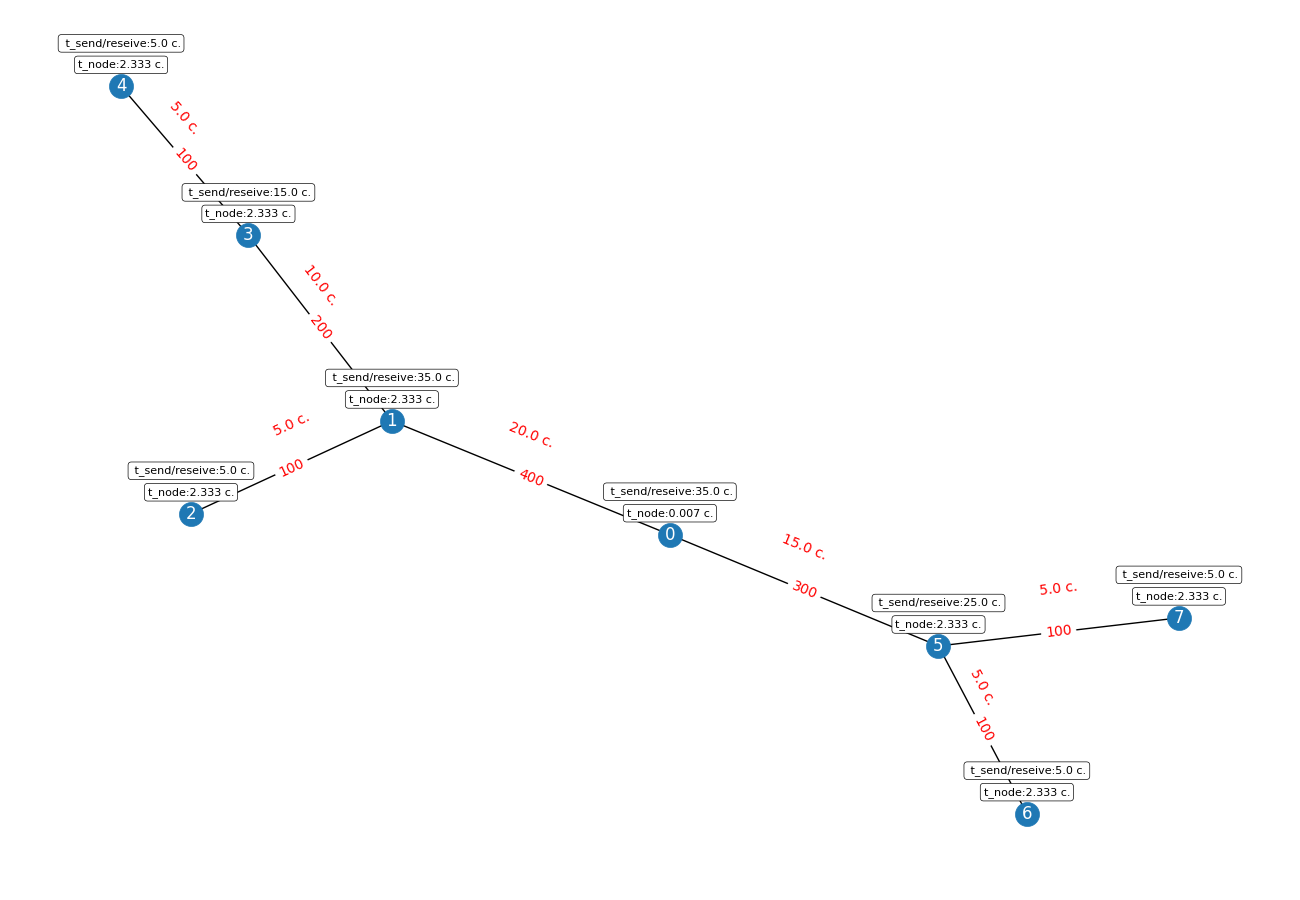

In [33]:
experements[0][-1][-1].draw_result()

In [34]:
print(experements[0][-1][-1])

Cвертка: 0.0007692307692307692,
Временя выполнение задачи (с): 211.34,
Хромосома: [3 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 400, '05': 300, '12': 100, '13': 200, '34': 100, '56': 100, '57': 100}
v_reseive_to_node: [700, 300, 0, 100, 0, 200, 0, 0]
v_sent_to_node: [0, 400, 100, 200, 100, 300, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 35.0, 5.0, 15.0, 5.0, 25.0, 5.0, 5.0]
t_edges: [20.0, 15.0, 5.0, 10.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Объемы передаваемой информации / min:1300
Ограничения
1




In [35]:
CRITERIA = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Временя выполнение задачи (с)' :[f1, 'min', {'index_node':[i for i in range(net.number)],}],
        'Энергопотребление (МВт)' : [f2, 'min', {'index_node':[i for i in range(net.number)]}],
        'Объемы передаваемой информации' : [f3, 'min', {'index_node':[i for i in range(net.number)]}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
        #'Нагрузка':{
        #    'index_node': [i for i in range(net.number)],
        #    'f': [f4, 'min', {}]
        #},
        #'Объемы передаваемой информации': {
        #    'index_node': [i for i in range(net.number)],
        #    'f':[f5, 'min', {}]
        #},
    }
}
LIMITATIONS = {
    'all/group':{
        # 'Название':[функция, 'min'/'max', [index_node:узлы на которые вешаем критерий, {дополнительные параметры}]]
        # 'Ограничение по времени' :[f1, {'index_node':[i for i in range(net.number)], 'T_lim': 77}],
    },
    'mashin': {
        # 'Название'{
        #     index_node: [узлы на которые вешаем критерий]
        #     'f':[функция, 'min'/'max', {дополнительные параметры}]]
        # }
    }

}

In [36]:
Solution._NET = net
Solution._TASK = task
Solution._CRITERIA = CRITERIA
Solution._LIMITATIONS = LIMITATIONS

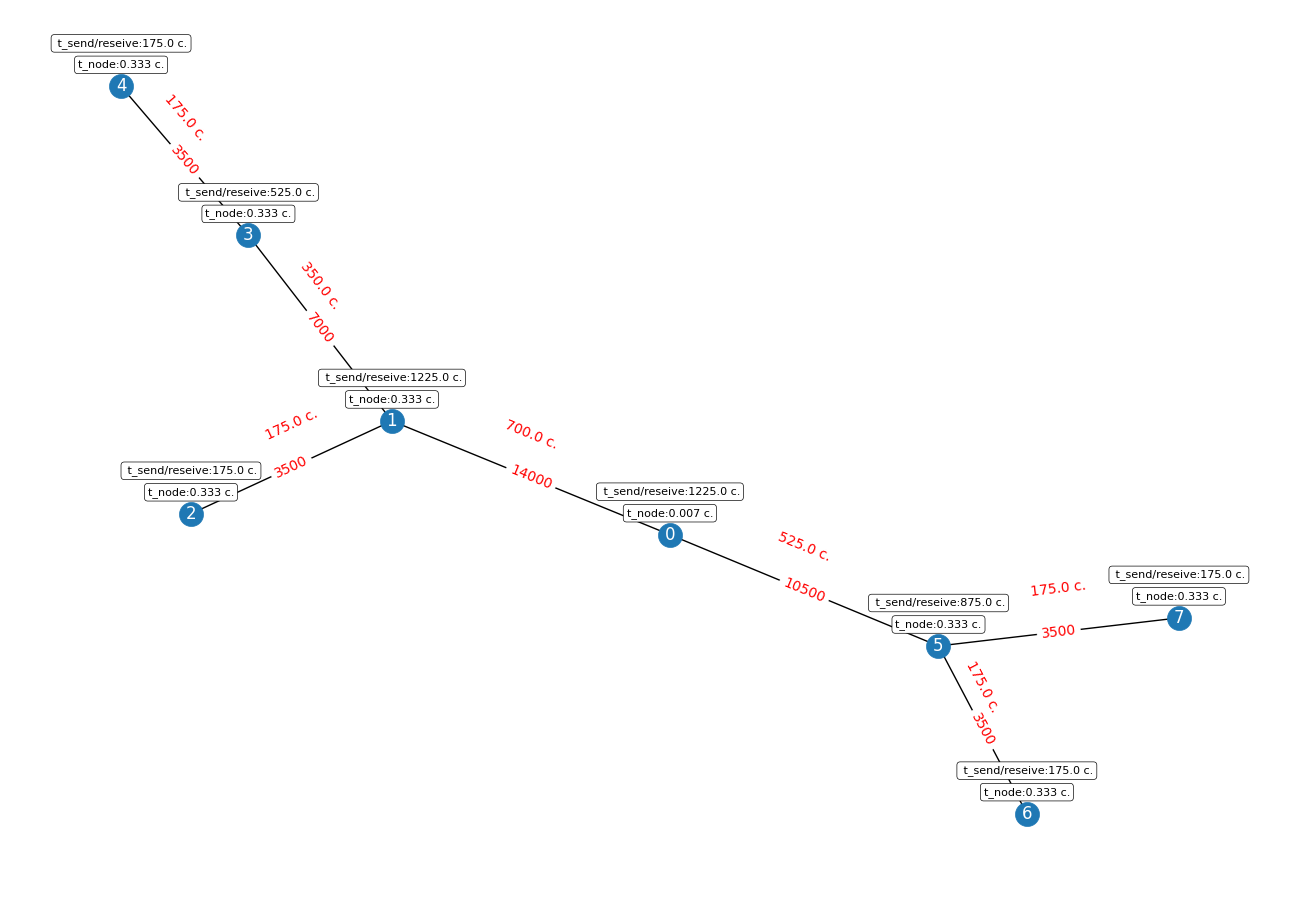

Cвертка: 4.599415884481968e-11,
Временя выполнение задачи (с): 6827.34,
Хромосома: [0 0 0 0 0 0 0 0]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 500, 500, 500, 500, 500, 500, 500]
Нагрузка на сеть: {'01': 14000, '05': 10500, '12': 3500, '13': 7000, '34': 3500, '56': 3500, '57': 3500}
v_reseive_to_node: [24500, 10500, 0, 3500, 0, 7000, 0, 0]
v_sent_to_node: [0, 14000, 3500, 7000, 3500, 10500, 3500, 3500]
t_node: [0.006666666666666667, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
t_send_reseive_data_node: [1225.0, 1225.0, 175.0, 525.0, 175.0, 875.0, 175.0, 175.0]
t_edges: [700.0, 525.0, 175.0, 350.0, 175.0, 175.0, 175.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:477843.76386083994
Объем

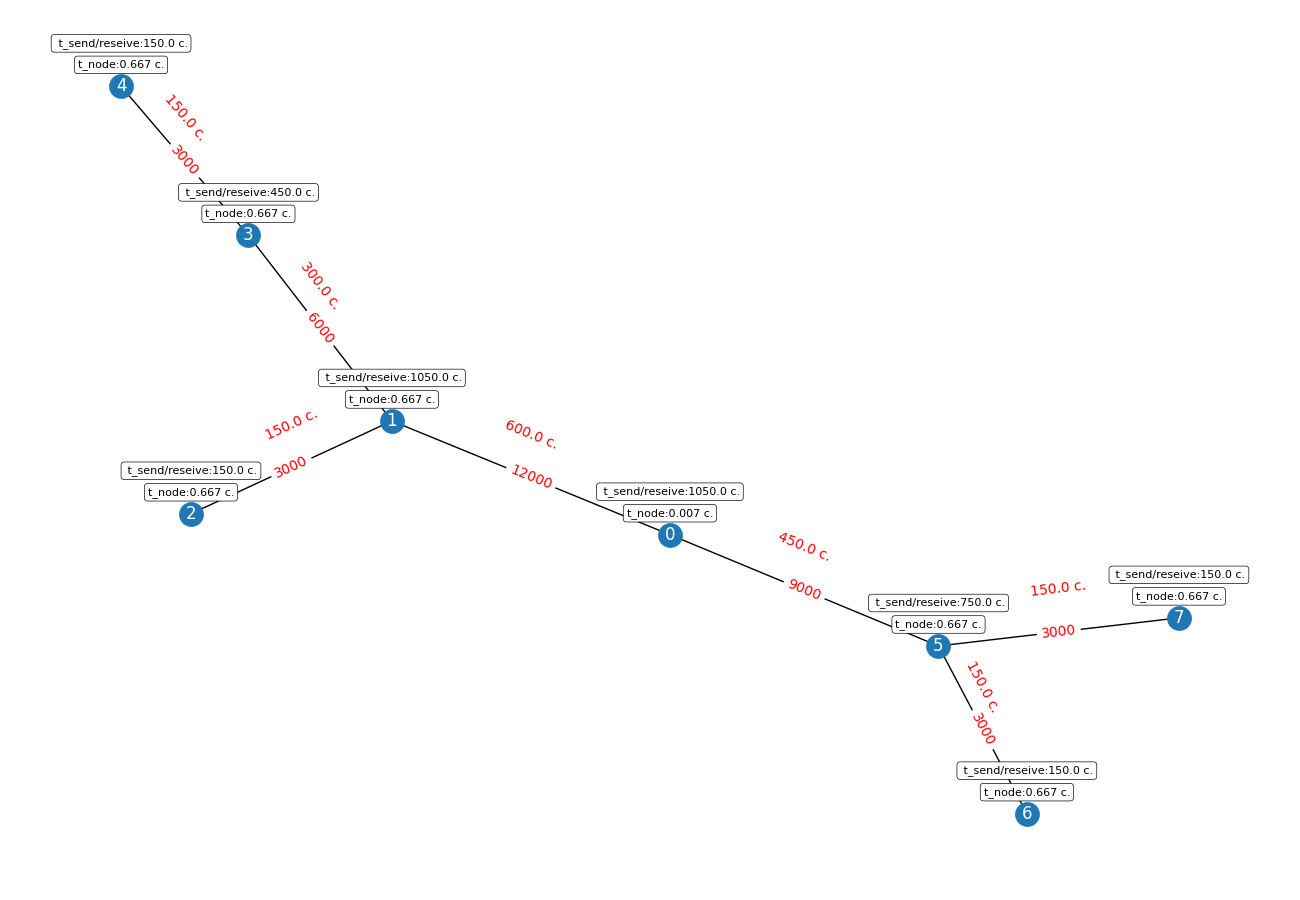

Cвертка: 6.258685537662521e-11,
Временя выполнение задачи (с): 5854.673333333333,
Хромосома: [1 1 1 1 1 1 1 1]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Нагрузка на сеть: {'01': 12000, '05': 9000, '12': 3000, '13': 6000, '34': 3000, '56': 3000, '57': 3000}
v_reseive_to_node: [21000, 9000, 0, 3000, 0, 6000, 0, 0]
v_sent_to_node: [0, 12000, 3000, 6000, 3000, 9000, 3000, 3000]
t_node: [0.006666666666666667, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
t_send_reseive_data_node: [1050.0, 1050.0, 150.0, 450.0, 150.0, 750.0, 150.0, 150.0]
t_edges: [600.0, 450.0, 150.0, 300.0, 150.0, 150.0, 150.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:409687.073

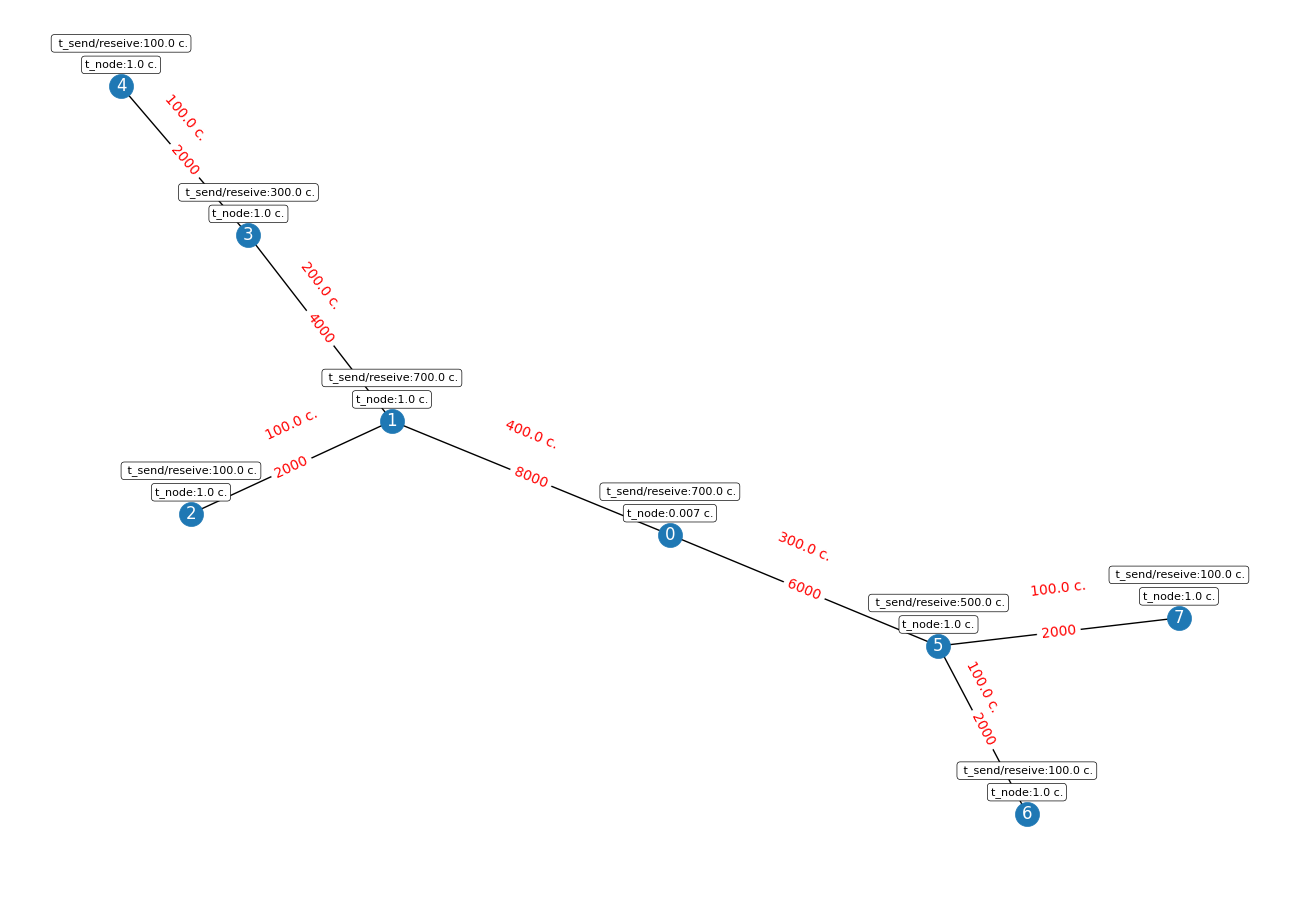

Cвертка: 1.4074022150134982e-10,
Временя выполнение задачи (с): 3907.0066666666667,
Хромосома: [2 2 2 2 2 2 2 2]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 1500, 1500, 1500, 1500, 1500, 1500, 1500]
Нагрузка на сеть: {'01': 8000, '05': 6000, '12': 2000, '13': 4000, '34': 2000, '56': 2000, '57': 2000}
v_reseive_to_node: [14000, 6000, 0, 2000, 0, 4000, 0, 0]
v_sent_to_node: [0, 8000, 2000, 4000, 2000, 6000, 2000, 2000]
t_node: [0.006666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
t_send_reseive_data_node: [700.0, 700.0, 100.0, 300.0, 100.0, 500.0, 100.0, 100.0]
t_edges: [400.0, 300.0, 100.0, 200.0, 100.0, 100.0, 100.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:273280.36044884
Объемы передаваемой информации / min:26000
Ограничения
1




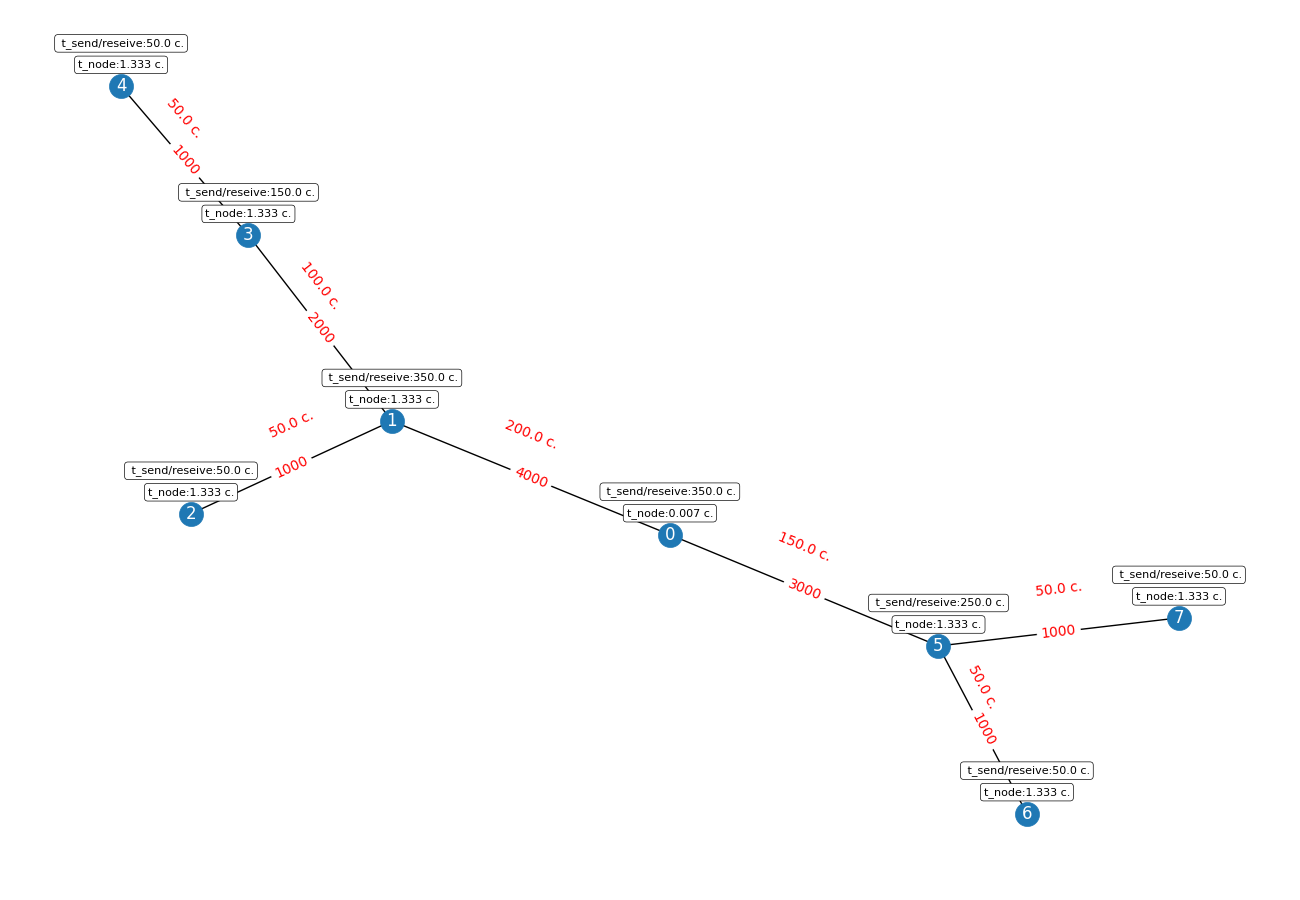

Cвертка: 5.620006377049398e-10,
Временя выполнение задачи (с): 1959.34,
Хромосома: [3 3 3 3 3 3 3 3]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Нагрузка на сеть: {'01': 4000, '05': 3000, '12': 1000, '13': 2000, '34': 1000, '56': 1000, '57': 1000}
v_reseive_to_node: [7000, 3000, 0, 1000, 0, 2000, 0, 0]
v_sent_to_node: [0, 4000, 1000, 2000, 1000, 3000, 1000, 1000]
t_node: [0.006666666666666667, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333]
t_send_reseive_data_node: [350.0, 350.0, 50.0, 150.0, 50.0, 250.0, 50.0, 50.0]
t_edges: [200.0, 150.0, 50.0, 100.0, 50.0, 50.0, 50.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:136873.64704284
Объемы передаваем

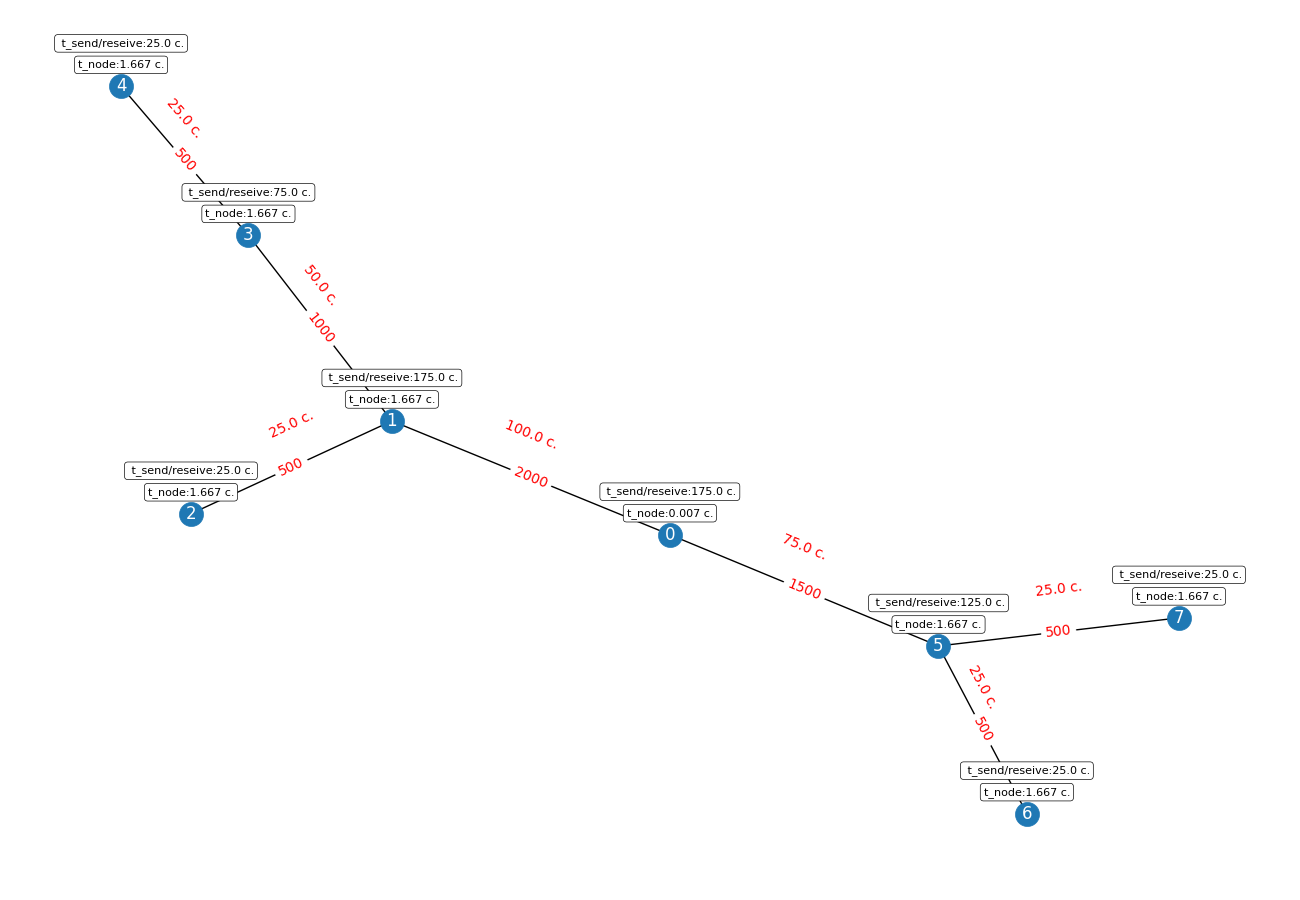

Cвертка: 2.2388382792281543e-09,
Временя выполнение задачи (с): 986.6733333333333,
Хромосома: [4 4 4 4 4 4 4 4]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 2500, 2500, 2500, 2500, 2500, 2500, 2500]
Нагрузка на сеть: {'01': 2000, '05': 1500, '12': 500, '13': 1000, '34': 500, '56': 500, '57': 500}
v_reseive_to_node: [3500, 1500, 0, 500, 0, 1000, 0, 0]
v_sent_to_node: [0, 2000, 500, 1000, 500, 1500, 500, 500]
t_node: [0.006666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667]
t_send_reseive_data_node: [175.0, 175.0, 25.0, 75.0, 25.0, 125.0, 25.0, 25.0]
t_edges: [100.0, 75.0, 25.0, 50.0, 25.0, 25.0, 25.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:68716.95703683999
Объемы передавае

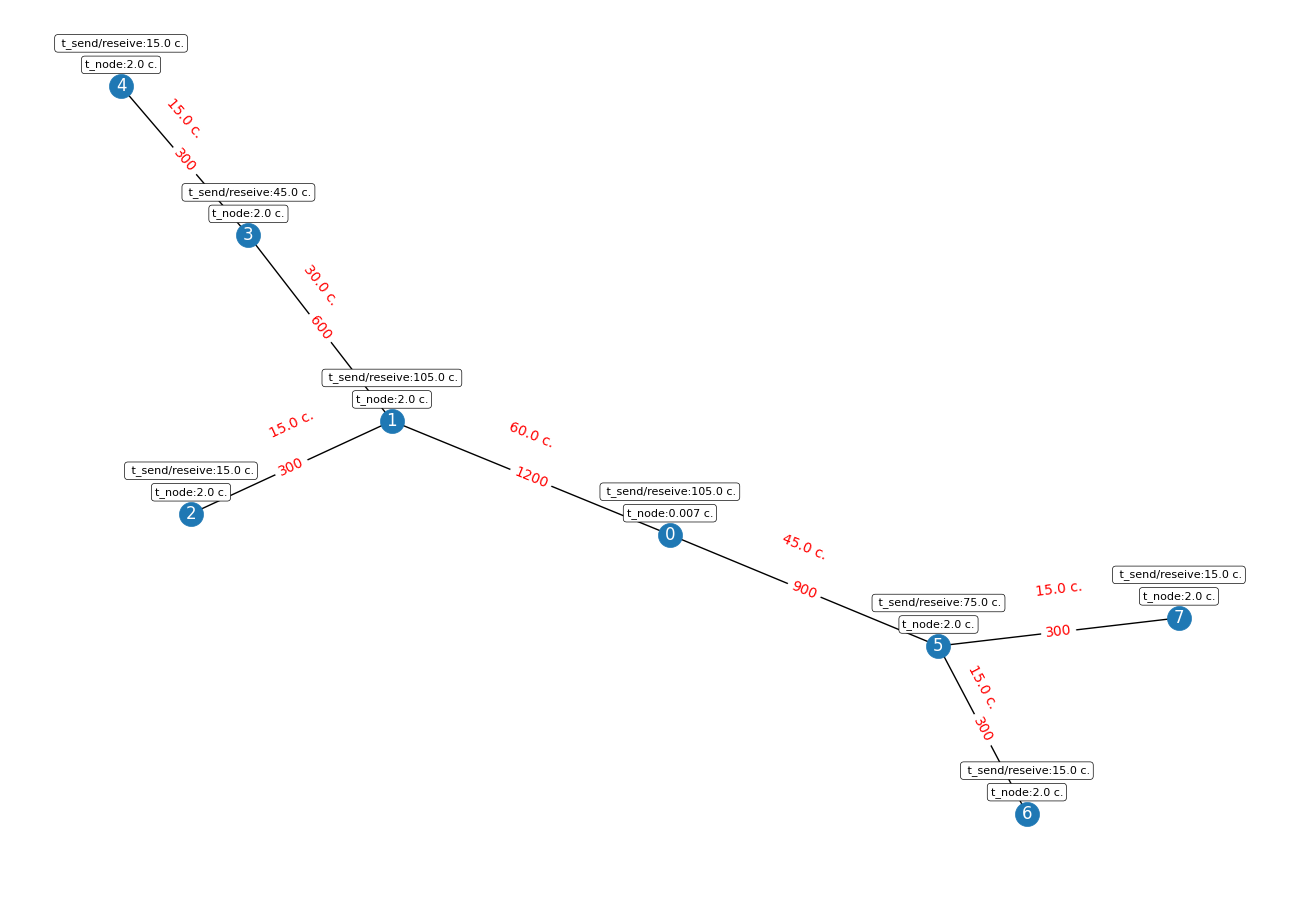

Cвертка: 6.177030118699404e-09,
Временя выполнение задачи (с): 599.0066666666667,
Хромосома: [5 5 5 5 5 5 5 5]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 3000, 3000, 3000, 3000, 3000, 3000, 3000]
Нагрузка на сеть: {'01': 1200, '05': 900, '12': 300, '13': 600, '34': 300, '56': 300, '57': 300}
v_reseive_to_node: [2100, 900, 0, 300, 0, 600, 0, 0]
v_sent_to_node: [0, 1200, 300, 600, 300, 900, 300, 300]
t_node: [0.006666666666666667, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
t_send_reseive_data_node: [105.0, 105.0, 15.0, 45.0, 15.0, 75.0, 15.0, 15.0]
t_edges: [60.0, 45.0, 15.0, 30.0, 15.0, 15.0, 15.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:41510.28107084
Объемы передаваемой информации / min:3900
Ограничения
1




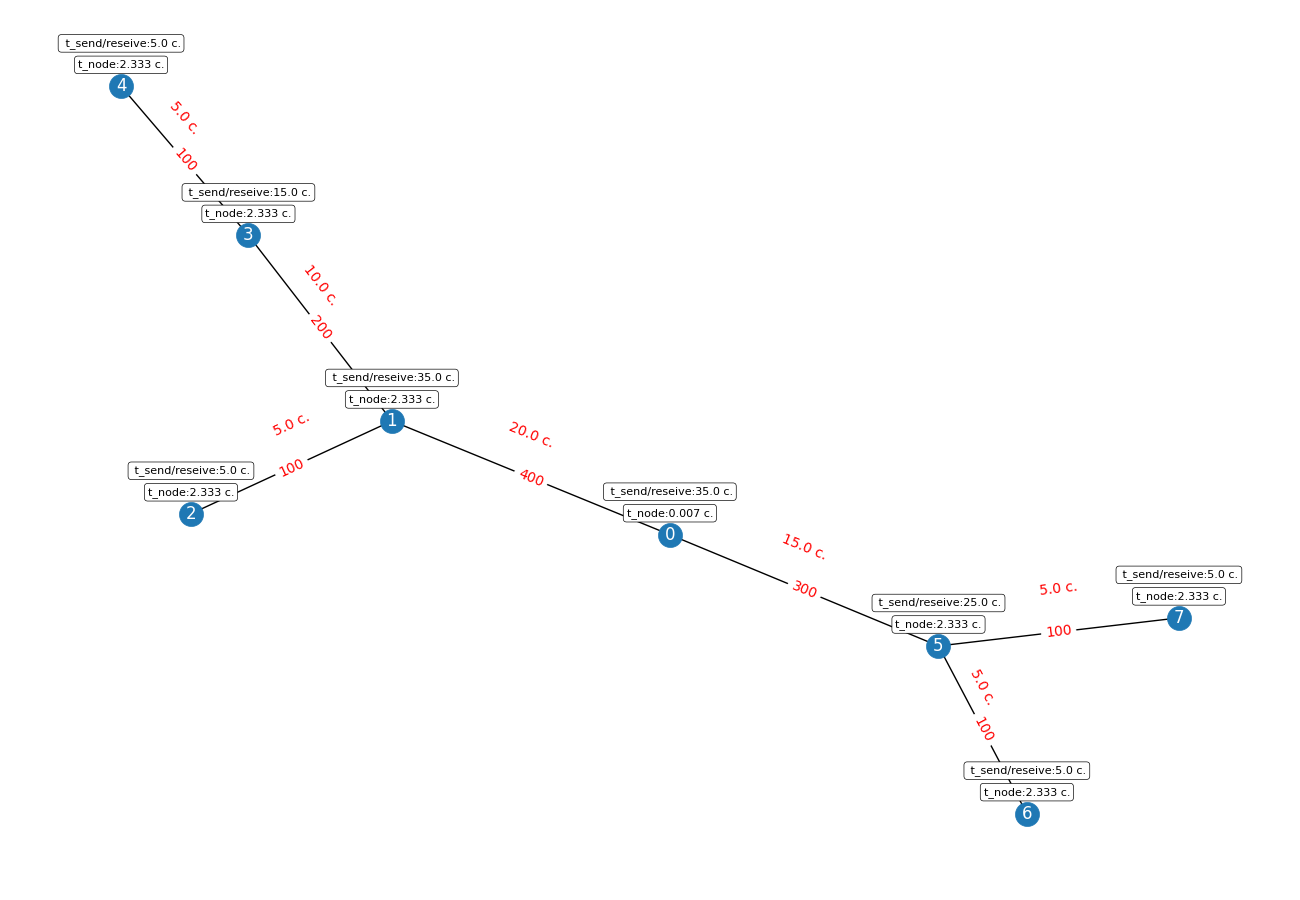

Cвертка: 5.3778803566835045e-08,
Временя выполнение задачи (с): 211.34,
Хромосома: [6 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 400, '05': 300, '12': 100, '13': 200, '34': 100, '56': 100, '57': 100}
v_reseive_to_node: [700, 300, 0, 100, 0, 200, 0, 0]
v_sent_to_node: [0, 400, 100, 200, 100, 300, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 35.0, 5.0, 15.0, 5.0, 25.0, 5.0, 5.0]
t_edges: [20.0, 15.0, 5.0, 10.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:14303.605104839999
Объемы передаваемой информации / min:1300
Огран

In [37]:
for i in range(7):
  res = Solution(np.full((8,), i))
  res.draw_result()
  print(res)

In [38]:
experements = []
arr_algo = []

for i in range(10):
    RANDOM_SEED = i
    random.seed(RANDOM_SEED)
    np.random.seed(RANDOM_SEED)
    algo = GA(100, 0.9, 0.1, 100)
    algo.optimize()
    arr_algo.append(algo)
    experements.append(algo.HISTORY)
    algo.print_res()
    print()

Cвертка: 5.3778803566835045e-08,
Временя выполнение задачи (с): 211.34,
Хромосома: [3 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 400, '05': 300, '12': 100, '13': 200, '34': 100, '56': 100, '57': 100}
v_reseive_to_node: [700, 300, 0, 100, 0, 200, 0, 0]
v_sent_to_node: [0, 400, 100, 200, 100, 300, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 35.0, 5.0, 15.0, 5.0, 25.0, 5.0, 5.0]
t_edges: [20.0, 15.0, 5.0, 10.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:14303.605104839999
Объемы передаваемой информации / min:1300
Огран

<ipython-input-39-3d584a83d833>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


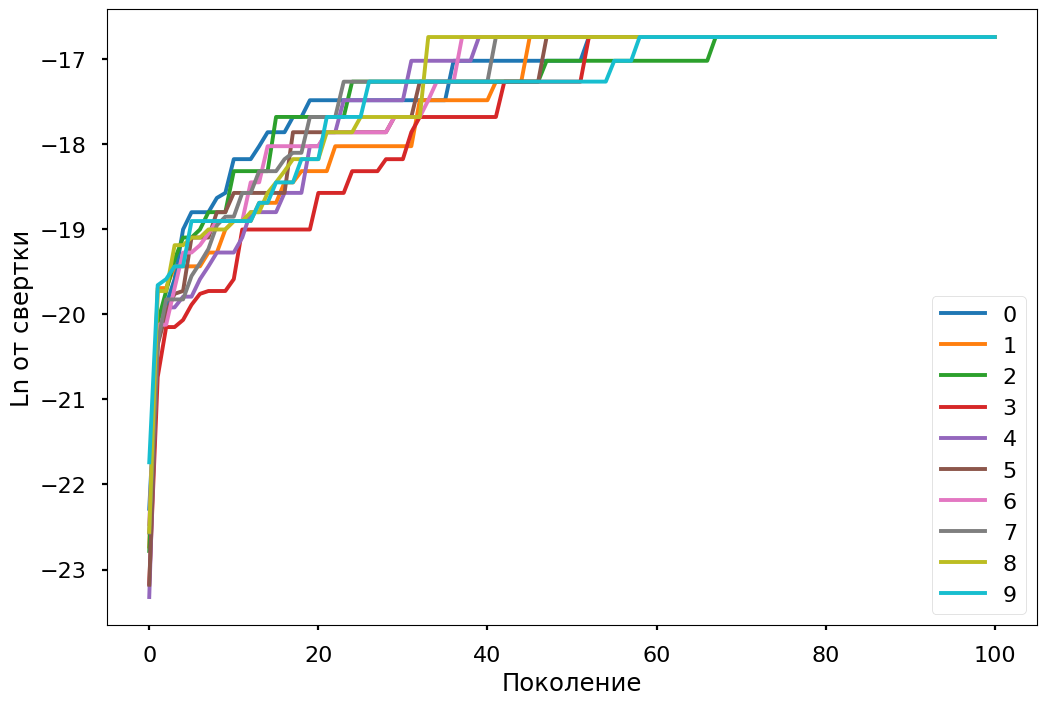

In [39]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')


plt.figure(figsize = (12, 8))
for exp in range(len(experements)):
  plt.plot([i for i in range(len(experements[exp]))], np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))]), label = str(exp))

plt.xlabel('Поколение')
plt.ylabel('Ln от свертки')
plt.legend()
plt.show()

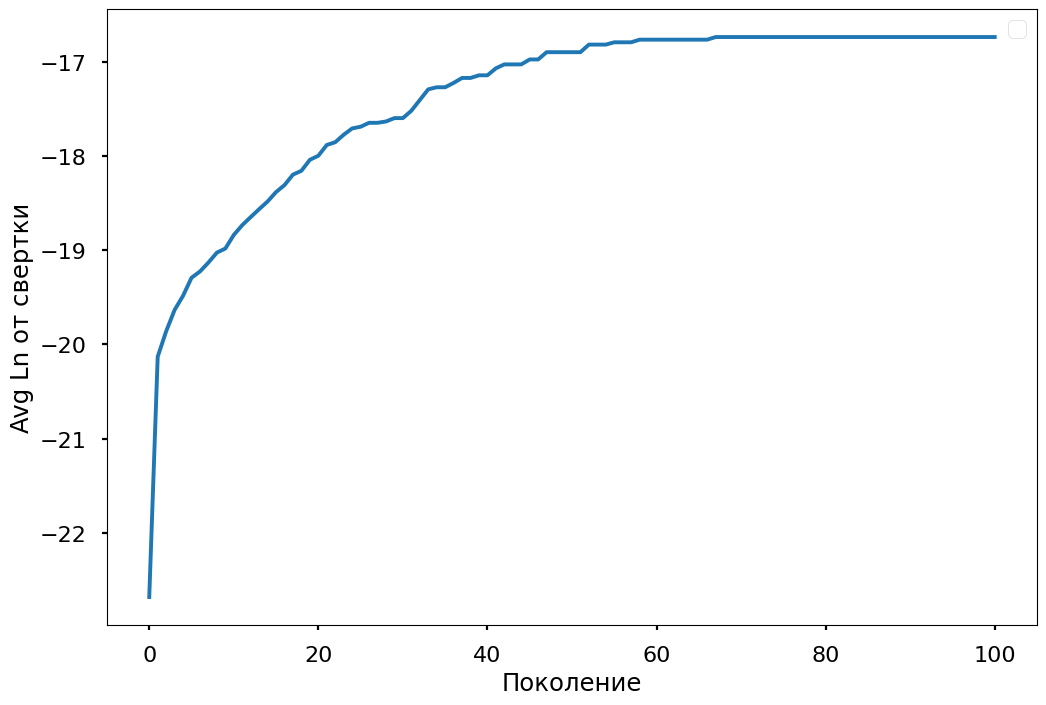

In [40]:
plt.figure(figsize = (12, 8))
y = np.zeros(len(experements[exp]))
for exp in range(len(experements)):
  y += np.log([getattr(experements[exp][i][-1], 'Свертка') for i in range(len(experements[exp]))])

plt.plot([i for i in range(len(experements[exp]))], y/10)

plt.xlabel('Поколение')
plt.ylabel('Avg Ln от свертки')
plt.legend()
plt.show()

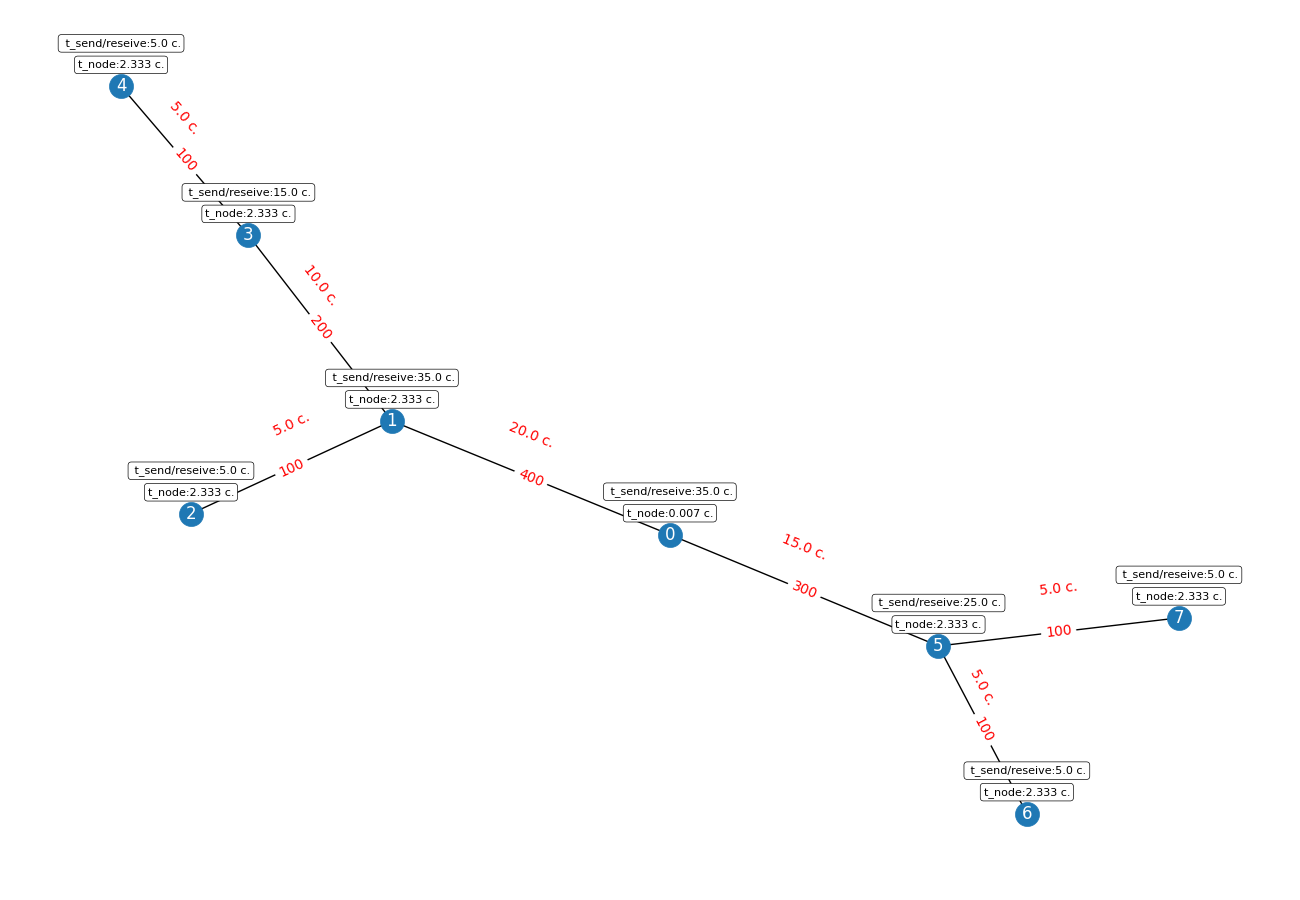

In [41]:
experements[0][-1][-1].draw_result()

In [42]:
print(experements[0][-1][-1])

Cвертка: 5.3778803566835045e-08,
Временя выполнение задачи (с): 211.34,
Хромосома: [3 6 6 6 6 6 6 6]
Распределение: [0, 1, 2, 3, 4, 5, 6, 7],
Маршруты передачи данных  задача1задача2:путь: {'10': [1, 0], '20': [2, 1, 0], '30': [3, 1, 0], '40': [4, 3, 1, 0], '50': [5, 0], '60': [6, 5, 0], '70': [7, 5, 0]}
Нагруженность на узлы: [10, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
Нагрузка на сеть: {'01': 400, '05': 300, '12': 100, '13': 200, '34': 100, '56': 100, '57': 100}
v_reseive_to_node: [700, 300, 0, 100, 0, 200, 0, 0]
v_sent_to_node: [0, 400, 100, 200, 100, 300, 100, 100]
t_node: [0.006666666666666667, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335]
t_send_reseive_data_node: [35.0, 35.0, 5.0, 15.0, 5.0, 25.0, 5.0, 5.0]
t_edges: [20.0, 15.0, 5.0, 10.0, 5.0, 5.0, 5.0]

Целевые функции (критерии оценки)
Энергопотребление (МВт) / min:14303.605104839999
Объемы передаваемой информации / min:1300
Огран